<a href="https://colab.research.google.com/github/Nnete08/unsupervised-predict-streamlit-template/blob/master/BCX_Internship_project_v1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BCX CPS Accelerate IT Service Management automation

## Overview

The challenge is to harness the power of data science to proactively manage escalations, correlate their causes, and effeciently engage relevant stakeholders.

## Objectives:
1. Escalation prediction and coordination: by developing data science models that predict escalations before they occur based on historical data and relevant triggers.
2. Stakeholder availability optimization: by creating data science models that optimize the availability of stakeholders per service or product.
3. Escalation correlation and trend analysis: by building data science models that correlate different types escalations and identify trends across services or products.
4. Escalation alerting and communication enhancement: by enhancing the communication and alerting system for escalations by integrating data science models.

## 1. Importing Packages

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

#import ydata_profiling
#import missingno as msno
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
G = nx.DiGraph()

#Model Development

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Master_table = pd.read_csv('/content/drive/MyDrive/MASTER_TABLE.csv',encoding='latin-1')

In [ ]:
#!pip install ydata_profiling

In [ ]:
#!pip install missingno

In [ ]:
#import ydata_profiling

In [ ]:
#ydata_profiling.ProfileReport(Master_table)

# Initial Exploratory Data Analysis (IEDA)

In [ ]:
Master_table.shape

(99743, 40)

In [ ]:
pd.set_option('display.max_columns', 100)
Master_table.head()

,Unnamed: 0,incident_number,assignee,assignee_login_id,assigned_group,contact_company,last_modified_date,submit_date,reported_date,major_incident,priority,product_categorization_tier_1,re_opened_date,region,reported_source,service_type,serviceci,site,site_group,status,total_transfers,z1d_template_name,is_closed,is_24h_sla,data_source,company,date_rated,satisfied,dissatisfied,satisfied_vs_dissatisfied,answer_sheet_date_rated,date_closed,last_resolved_date,answer_sheet_assignee,impact,Sentiment,Dominant_Topic,days_since_report,overall_time,incidents_count
0,0,INC000031465842,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2023-04-03 09:53:42+00:00,2023-03-29 07:44:10+00:00,2023-03-29 07:41:14+00:00,No,High,Application,NaN,KwaZulu-Natal,Phone,User Service Restoration,Hardware Service,NMR SAS,Durban,Closed,1.0,SASO BOS - Monitor faulty,True,True,incidents,Sasol Oil (Pty) Ltd,20230401,0,1,Extremely Dissatisfied,2023-05-01 00:00:00+00:00,20230403.0,2023-04-14 00:00:00+00:00,Msawenkosi Zuma,2-Significant/Large,Neutral,0.0,5.0,0.0,1.0
1,1,INC000031508765,Eric Ramokgadi,nbc-ericr,NBCRFLI EUC Support,National Bargaining Council Road Freight Logis...,2023-04-04 10:46:54+00:00,2023-04-03 07:29:18+00:00,2023-04-03 07:27:15+00:00,No,Low,Network,NaN,Western Cape,Email,User Service Request,Network Service,NBCRFLI Cape Town,Parrow,Closed,1.0,NBC VPN Assist,True,False,request,National Bargaining Council Road Freight Logis...,20230406,0,1,Extremely Dissatisfied,2023-10-30 00:00:00+00:00,20230404.0,2023-10-30 00:00:00+00:00,Eric Ramokgadi,4-Minor/Localized,Neutral,0.0,1.0,1.0,3.0
2,2,INC000031582492,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2023-04-17 09:28:52+00:00,2023-04-11 12:00:37+00:00,2023-04-11 11:27:08+00:00,No,High,Software,NaN,Gauteng,Phone,User Service Restoration,Application Service,Brodies SS SAS,Johannesburg,Closed,3.0,SASO POS - POS error,True,True,incidents,Sasol Oil (Pty) Ltd,20230412,0,1,Extremely Dissatisfied,2022-10-10 00:00:00+00:00,20230417.0,2022-10-07 00:00:00+00:00,Msawenkosi Zuma,2-Significant/Large,Neutral,0.0,5.0,0.0,1.0
3,3,INC000030357959,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2022-12-17 14:32:53+00:00,2022-12-11 08:54:11+00:00,2022-12-11 08:49:12+00:00,No,Medium,Application,NaN,Free State,Phone,User Service Restoration,Application Service,Route 7 SS SAS,Phuthaditjaba,Closed,1.0,SASO BOS - Price Error,True,False,incidents,Sasol Oil (Pty) Ltd,20221212,0,1,Extremely Dissatisfied,2023-02-12 00:00:00+00:00,20221217.0,2023-02-11 00:00:00+00:00,Msawenkosi Zuma,3-Moderate/Limited,Neutral,0.0,6.0,1.0,1.0
4,4,INC000030998788,Johann Lingenfelder,johann.lingenfelder@bcx.co.za,SAP Security,National Bargaining Council Road Freight Logis...,2023-06-09 12:46:59+00:00,2023-02-09 09:40:30+00:00,2023-02-09 09:39:17+00:00,No,Low,Software,NaN,Gauteng,Email,User Service Request,SAP Service,NBCRFLI Braamfontein,Johannesburg,Closed,2.0,NBC SAP CO Assist,True,False,request,National Bargaining Council Road Freight Logis...,20230209,0,1,Extremely Dissatisfied,2023-02-09 00:00:00+00:00,20230214.0,2023-02-09 00:00:00+00:00,Johann Lingenfelder,4-Minor/Localized,Neutral,0.0,120.0,0.0,1.0


In [ ]:
Master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99743 entries, 0 to 99742
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     99743 non-null  int64  
 1   incident_number                99743 non-null  object 
 2   assignee                       46233 non-null  object 
 3   assignee_login_id              46233 non-null  object 
 4   assigned_group                 46234 non-null  object 
 5   contact_company                46234 non-null  object 
 6   last_modified_date             46234 non-null  object 
 7   submit_date                    46234 non-null  object 
 8   reported_date                  46234 non-null  object 
 9   major_incident                 46234 non-null  object 
 10  priority                       46234 non-null  object 
 11  product_categorization_tier_1  46233 non-null  object 
 12  re_opened_date                 306 non-null   

From the above 40 columns, 6 columns are float data type, 4 columns are integers and 30 columns are objects

In [ ]:
Master_table.isnull().sum()

Unnamed: 0                           0
incident_number                      0
assignee                         53510
assignee_login_id                53510
assigned_group                   53509
contact_company                  53509
last_modified_date               53509
submit_date                      53509
reported_date                    53509
major_incident                   53509
priority                         53509
product_categorization_tier_1    53510
re_opened_date                   99437
region                           53979
reported_source                  53509
service_type                     53509
serviceci                        53509
site                             55165
site_group                       54033
status                           53509
total_transfers                  53509
z1d_template_name                53961
is_closed                        53509
is_24h_sla                       53509
data_source                      53509
company                  

In [ ]:
Master_table.dtypes

Unnamed: 0                         int64
incident_number                   object
assignee                          object
assignee_login_id                 object
assigned_group                    object
contact_company                   object
last_modified_date                object
submit_date                       object
reported_date                     object
major_incident                    object
priority                          object
product_categorization_tier_1     object
re_opened_date                    object
region                            object
reported_source                   object
service_type                      object
serviceci                         object
site                              object
site_group                        object
status                            object
total_transfers                  float64
z1d_template_name                 object
is_closed                         object
is_24h_sla                        object
data_source     

In [ ]:
Master_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99743.0,4.987100e+04,28793.468287,0.0,24935.5,49871.0,74806.5,99742.0
total_transfers,46234.0,2.333413e+00,1.840899,0.0,1.0,2.0,3.0,62.0
date_rated,99743.0,2.022355e+07,6563.449989,20210701.0,20220413.0,20221017.0,20230518.0,20231119.0
satisfied,99743.0,2.699638e-01,0.443943,0.0,0.0,0.0,1.0,1.0
dissatisfied,99743.0,7.300362e-01,0.443943,0.0,0.0,1.0,1.0,1.0
date_closed,40073.0,2.022934e+07,3529.114843,20210711.0,20230219.0,20230530.0,20230826.0,20231120.0
Dominant_Topic,46227.0,7.631038e-01,1.257339,0.0,0.0,0.0,1.0,3.0
days_since_report,46234.0,3.582755e+01,99.325432,0.0,5.0,5.0,10.0,1045.0
overall_time,42624.0,2.892924e+00,15.669202,0.0,0.0,0.0,1.0,1040.0
incidents_count,46234.0,1.343730e+00,1.272707,1.0,1.0,1.0,1.0,69.0


In [ ]:
print(Master_table.columns)

Index(['Unnamed: 0', 'incident_number', 'assignee', 'assignee_login_id',
       'assigned_group', 'contact_company', 'last_modified_date',
       'submit_date', 'reported_date', 'major_incident', 'priority',
       'product_categorization_tier_1', 're_opened_date', 'region',
       'reported_source', 'service_type', 'serviceci', 'site', 'site_group',
       'status', 'total_transfers', 'z1d_template_name', 'is_closed',
       'is_24h_sla', 'data_source', 'company', 'date_rated', 'satisfied',
       'dissatisfied', 'satisfied_vs_dissatisfied', 'answer_sheet_date_rated',
       'date_closed', 'last_resolved_date', 'answer_sheet_assignee', 'impact',
       'Sentiment', 'Dominant_Topic', 'days_since_report', 'overall_time',
       'incidents_count'],
      dtype='object')


In [ ]:
numerical_features = Master_table.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Unnamed: 0', 'total_transfers', 'date_rated', 'satisfied',
       'dissatisfied', 'date_closed', 'Dominant_Topic', 'days_since_report',
       'overall_time', 'incidents_count'],
      dtype='object')


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

# Target Variable Distribution
#### Since our target variable is binary (satisfied_vs_dissatisfied), we can perform a focused analysis on this variable.

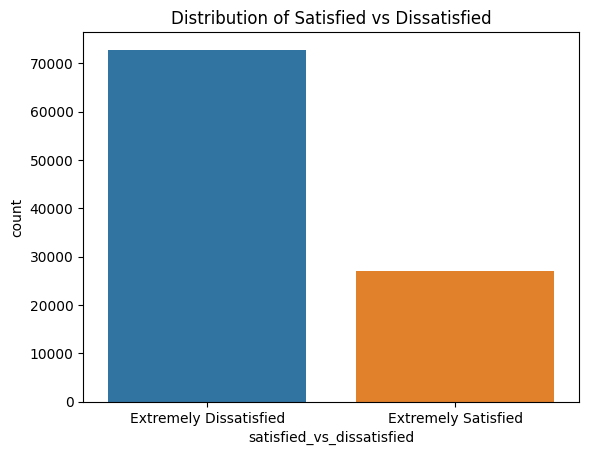

In [ ]:
sns.countplot(x='satisfied_vs_dissatisfied', data=Master_table)
plt.title('Distribution of Satisfied vs Dissatisfied')
plt.show()

In [ ]:
target_distribution = Master_table['satisfied'].value_counts()
print(target_distribution )

0    72816
1    26927
Name: satisfied, dtype: int64


The dataset appears to be imbalanced, with a significantly higher number of instances in the "Extremely Dissatisfied" category compared to the "Extremely Satisfied" category. Imbalanced datasets can pose challenges during model training, as models may become biased towards the majority class.

### Numerical Feature Distribution

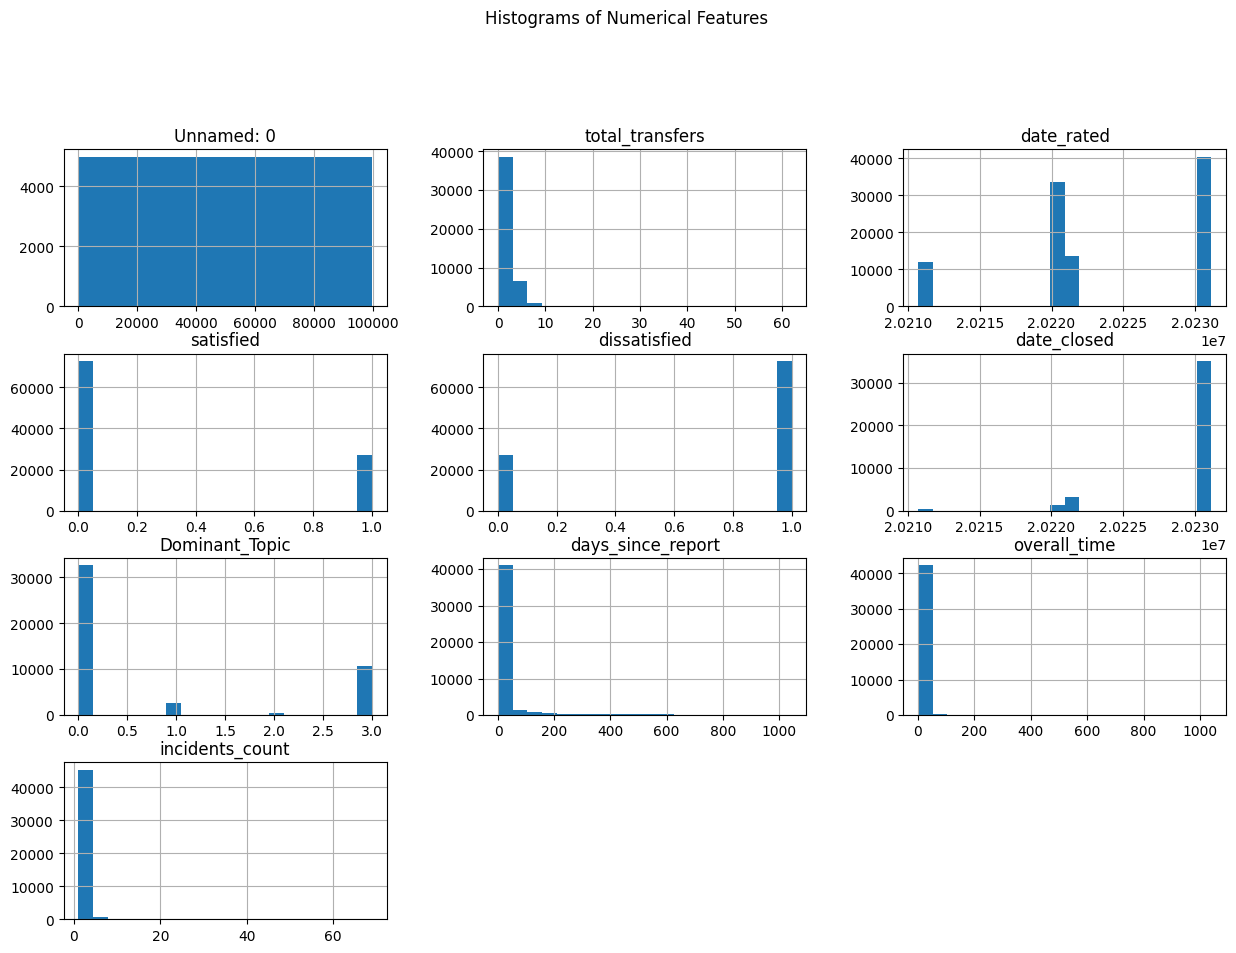

In [ ]:
# Select numerical columns
numerical_cols = Master_table.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
Master_table[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()


These helps us understand the distribution of numerical features. we can see that there are no visible distributions from the above graphs

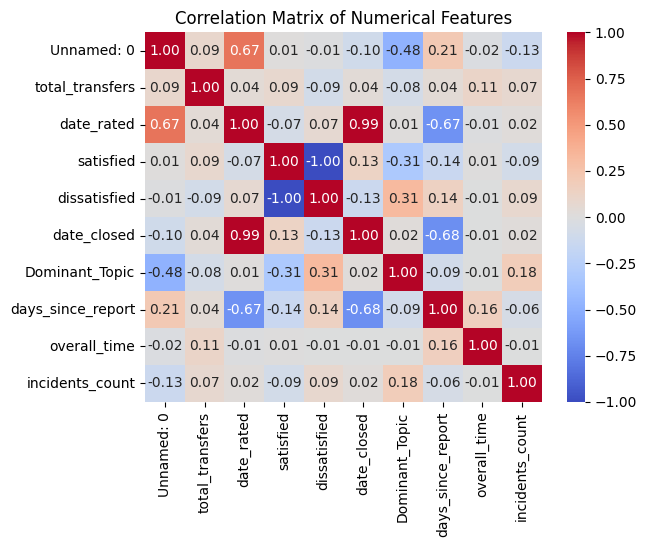

In [ ]:
# Plot the correlation matrix
correlation_matrix = Master_table[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix heatmap above provides insights into the relationships between numerical features in the dataset

## Categorical Feature Analysis

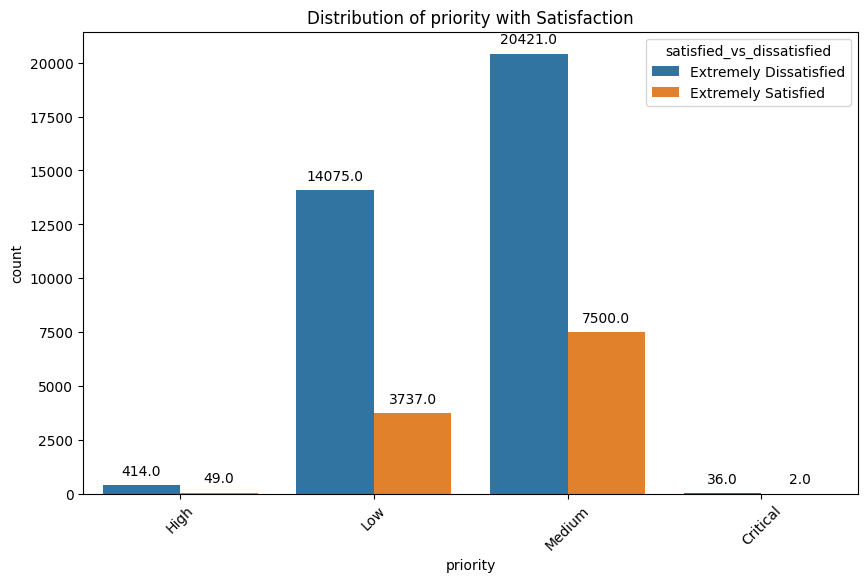

In [ ]:
categorical_cols = ['priority']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, hue='satisfied_vs_dissatisfied', data=Master_table)
    plt.title(f'Distribution of {col} with Satisfaction')
    plt.xticks(rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()


There is a higher count of "Extremely Dissatisfied" incidents compared to "Extremely Satisfied" incidents for Medium priority cases. This suggests that medium priority incidents are more likely to result in dissatisfaction.

In [ ]:
low_priority = 'Low'
filtered_priority = Master_table[Master_table['priority']== low_priority ]
counts = filtered_priority['priority'].groupby(filtered_priority['assignee']).count()
top_six_employees_low = counts.sort_values(ascending = False).head(6)
print(top_six_employees_low)

assignee
Generic IntegrationUser       483
System D ChatbotAPI           216
BADUDUZILE FORTUNATE MSANE    151
Garth Ronald Bayley           141
Buhle Nkwezane                136
Thabang Motsoeneng            134
Name: priority, dtype: int64


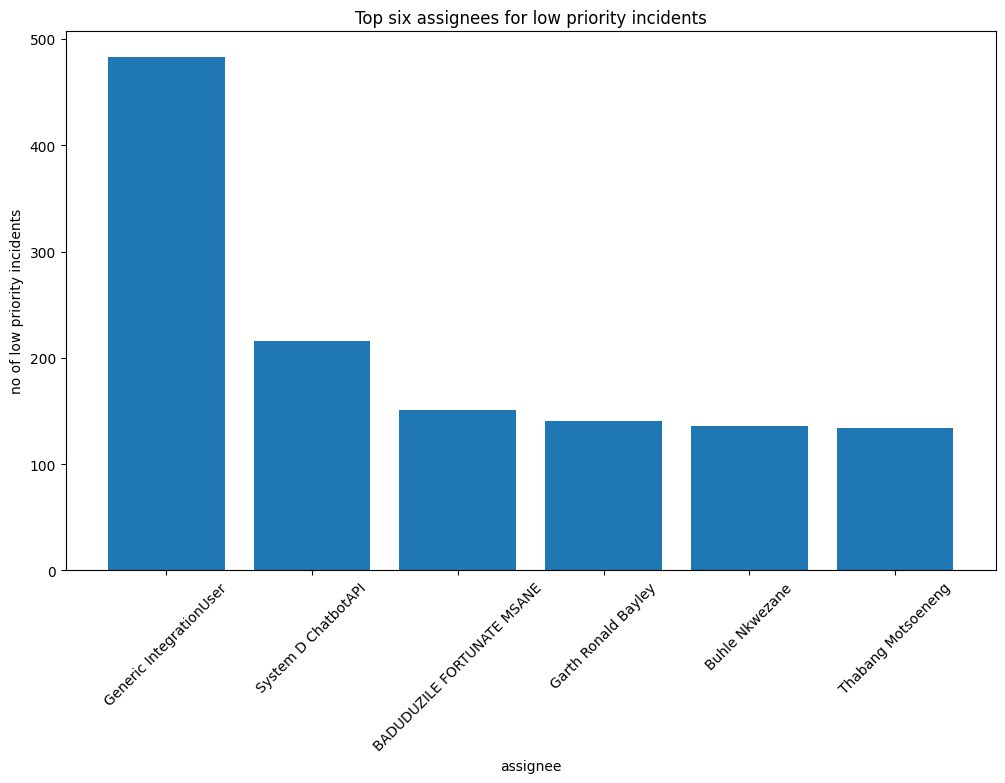

In [ ]:
plt.figure(figsize=(12, 7))
plt.bar(top_six_employees_low.index, top_six_employees_low.values)
plt.xlabel('assignee')
plt.ylabel('no of low priority incidents')
plt.title('Top six assignees for low priority incidents')
plt.xticks(rotation=45)
plt.show()

For low priority incidents, most incidents were handled by generic intergration user and system chatbotApi

In [ ]:
medium_priority = 'Medium'
filtered_priority = Master_table[Master_table['priority']== medium_priority]
counts = filtered_priority['priority'].groupby(filtered_priority['assignee']).count()
top_six_employees_medium = counts.sort_values(ascending = False).head(6)
print(top_six_employees_medium)

assignee
Themba Simelane              409
Patrick Thokozane Dlamini    407
Faith Kgati                  376
Thabang Motsoeneng           376
Robert Van Blerk             271
Lawrence Ramalepe            259
Name: priority, dtype: int64


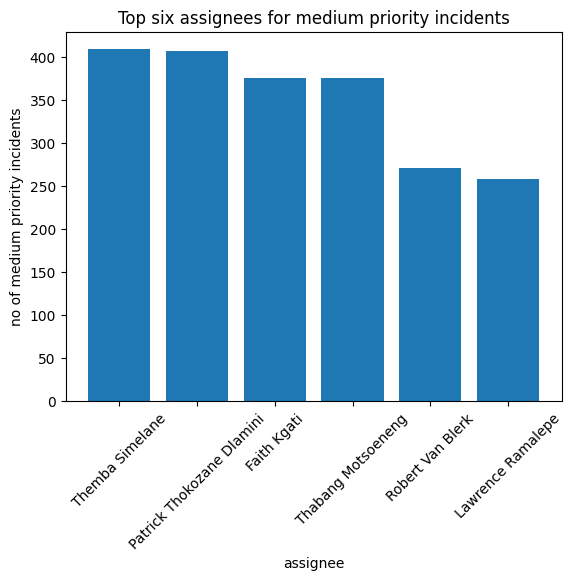

In [ ]:
plt.bar(top_six_employees_medium.index,top_six_employees_medium.values)
plt.xlabel('assignee')
plt.ylabel('no of medium priority incidents')
plt.title('Top six assignees for medium priority incidents')
plt.xticks(rotation=45)
plt.show()

For medium priority incidents, most incidents were handled by Themba simelane and Patrick Dlamini

In [ ]:
high_priority = 'High'
filtered_priority = Master_table[Master_table['priority']== high_priority]
counts = filtered_priority['priority'].groupby(filtered_priority['assignee']).count()
top_six_employees_high = counts.sort_values(ascending = False).head(6)
print(top_six_employees_high)

assignee
Msawenkosi Zuma    108
Jeffrey Dlamini     81
Msizi Ntaka         29
Ryan Narayadu       21
Dorain Bouls        18
Gareth Solomons     17
Name: priority, dtype: int64


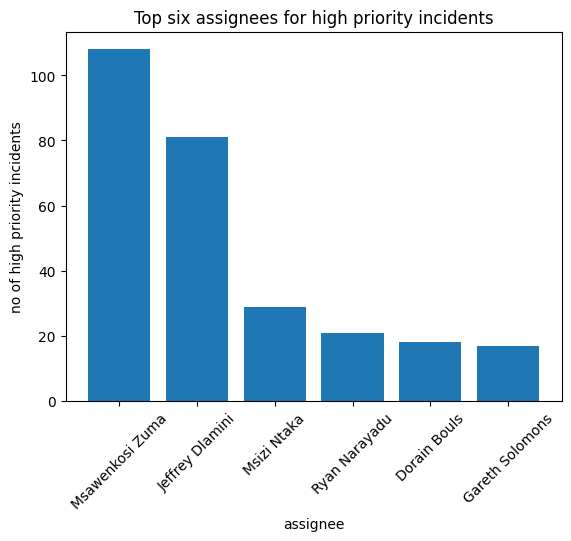

In [ ]:
plt.bar(top_six_employees_high.index,top_six_employees_high.values)
plt.xlabel('assignee')
plt.ylabel('no of high priority incidents')
plt.title('Top six assignees for high priority incidents')
plt.xticks(rotation=45)
plt.show()

The high priority incidents were handled by Msawenkosi Zuma and Jeffrey Dlamini

In [ ]:
critical_priority = 'Critical'
filtered_priority = Master_table[Master_table['priority']== critical_priority]
counts = filtered_priority['priority'].groupby(filtered_priority['assignee']).count()
top_six_employees_critical = counts.sort_values(ascending = False).head(6)
print(top_six_employees_critical)

assignee
Msawenkosi Zuma     19
Robert Van Blerk     3
Francois Coertze     2
George Davids        2
Gidion Rankwana      2
Mosa Mabetoa         2
Name: priority, dtype: int64


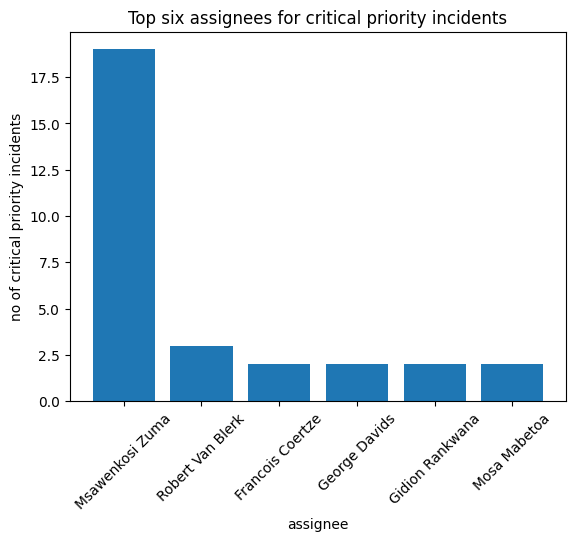

In [ ]:
plt.bar(top_six_employees_critical.index,top_six_employees_critical.values)
plt.xlabel('assignee')
plt.ylabel('no of critical priority incidents')
plt.title('Top six assignees for critical priority incidents')
plt.xticks(rotation=45)
plt.show()

Critical priority incidents were handled by Msawenkosi Zuma and Robert Van Blerk

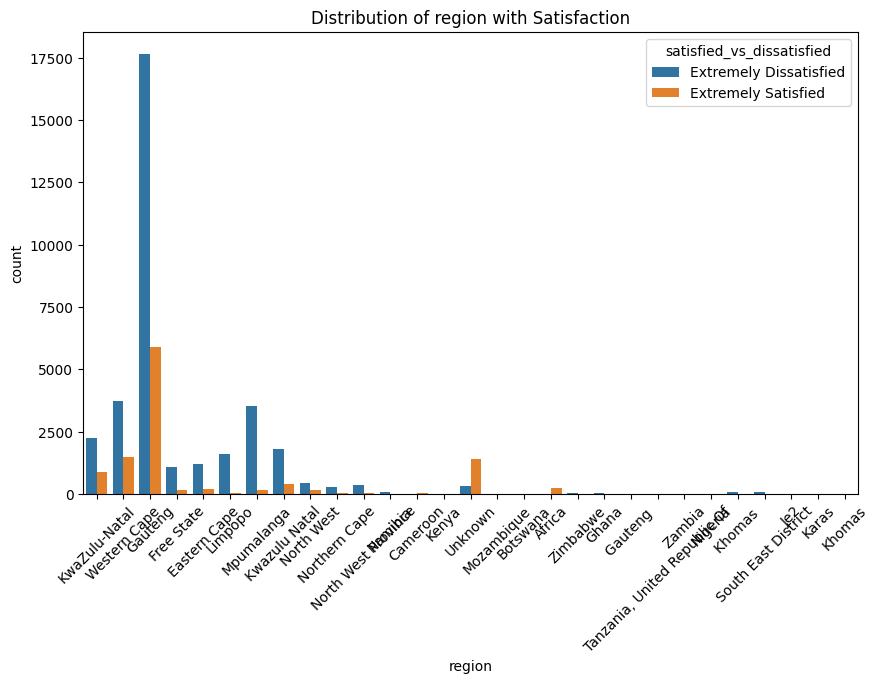

Counts of Satisfaction for Each region
satisfied_vs_dissatisfied     Extremely Dissatisfied  Extremely Satisfied
region                                                                   
Africa                                           5.0                247.0
Botswana                                         3.0                  NaN
Cameroon                                         NaN                 48.0
Eastern Cape                                  1201.0                193.0
Free State                                    1094.0                156.0
Gauteng                                      17660.0               5915.0
Gauteng                                          1.0                  NaN
Ghana                                           36.0                  NaN
Je2                                             13.0                  NaN
Karas                                            6.0                  NaN
Kenya                                            6.0                  NaN

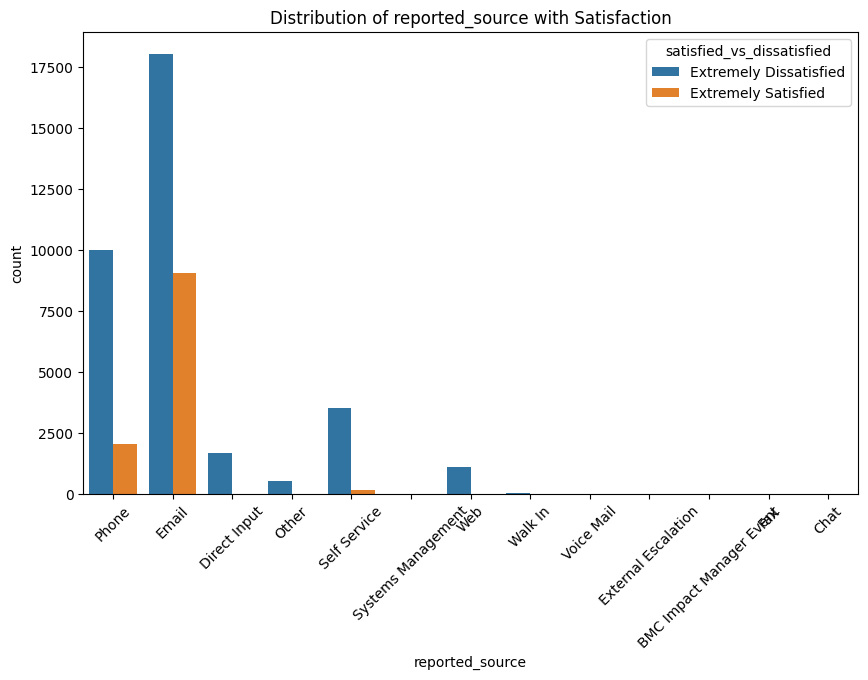

In [ ]:
categorical_cols = ['region']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='satisfied_vs_dissatisfied', data=Master_table)
    plt.title(f'Distribution of {col} with Satisfaction')
    plt.xticks(rotation=45)
    plt.show()
categorical_col = 'region'

# Get the counts for each category with respect to satisfaction
counts = Master_table.groupby([categorical_col, 'satisfied_vs_dissatisfied']).size().unstack()

# Print the counts
print("Counts of Satisfaction for Each", categorical_col)
print(counts)
categorical_cols = ['reported_source']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='satisfied_vs_dissatisfied', data=Master_table)
    plt.title(f'Distribution of {col} with Satisfaction')
    plt.xticks(rotation=45)
    plt.show()

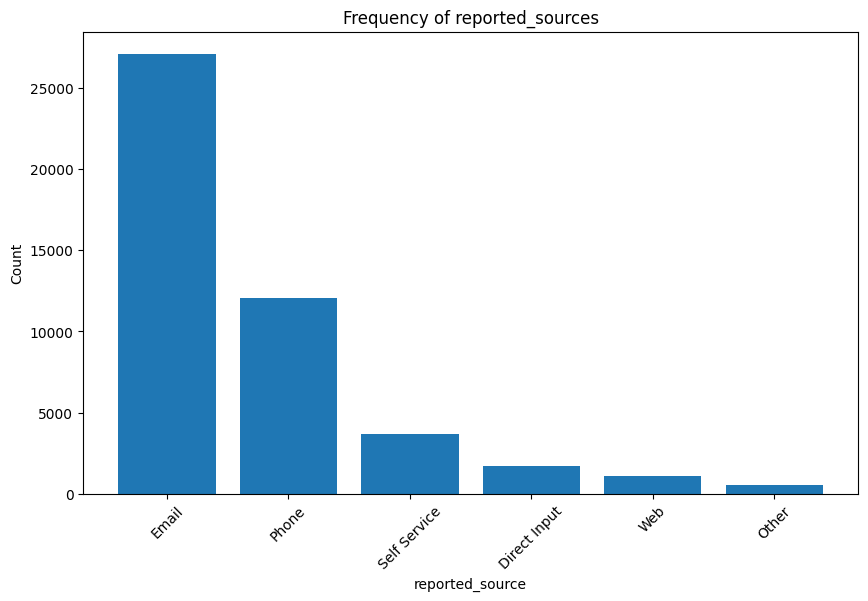

In [ ]:
category_counts = Master_table['reported_source'].value_counts().head(6)
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('reported_source')
plt.ylabel('Count')
plt.title('Frequency of reported_sources')
plt.xticks(rotation=45)
plt.show()


The bar plot above shows that most incidents were reported through emails followed by the phone calls

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Email'),
  Text(1, 0, 'Phone'),
  Text(2, 0, 'Self Service'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Direct Input')])

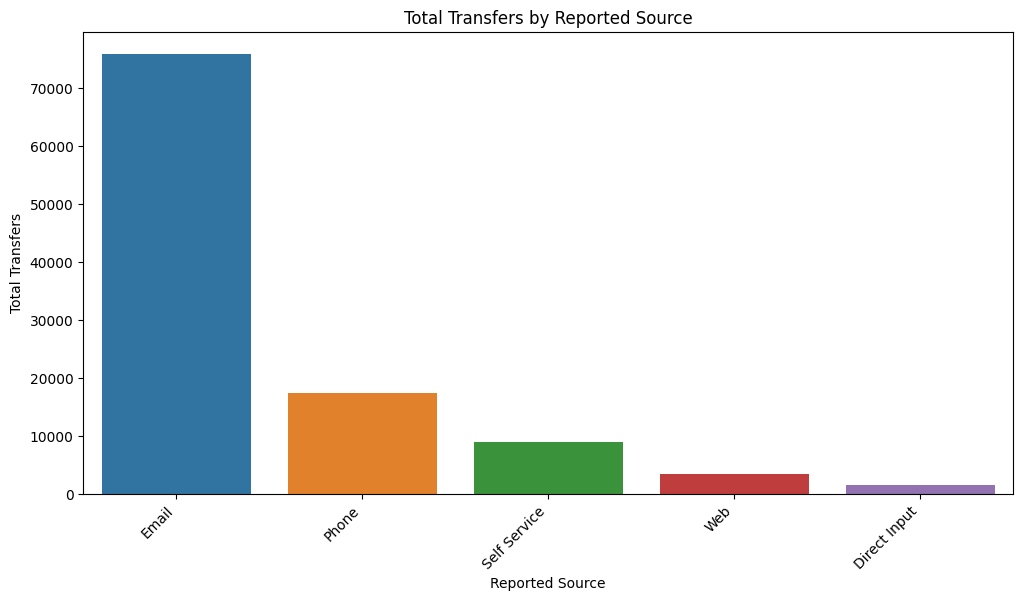

In [ ]:
# Group the DataFrame by 'reported_source' and calculate the total transfers
transfers_by_source = Master_table.groupby('reported_source')['total_transfers'].sum().reset_index()
# Plot the total transfers distribution with rotated x-axis labels
transfers_by_source = transfers_by_source.sort_values(by = 'total_transfers', ascending = False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x='reported_source', y='total_transfers', data=transfers_by_source)
plt.title('Total Transfers by Reported Source')
plt.xlabel('Reported Source')
plt.ylabel('Total Transfers')
plt.xticks(rotation=45, ha='right')

In [ ]:
Master_table['reported_source'].value_counts()

Email                       27110
Phone                       12061
Self Service                 3656
Direct Input                 1691
Web                          1094
Other                         542
Walk In                        41
Systems Management             16
External Escalation            11
Chat                            5
Voice Mail                      4
Fax                             2
BMC Impact Manager Event        1
Name: reported_source, dtype: int64

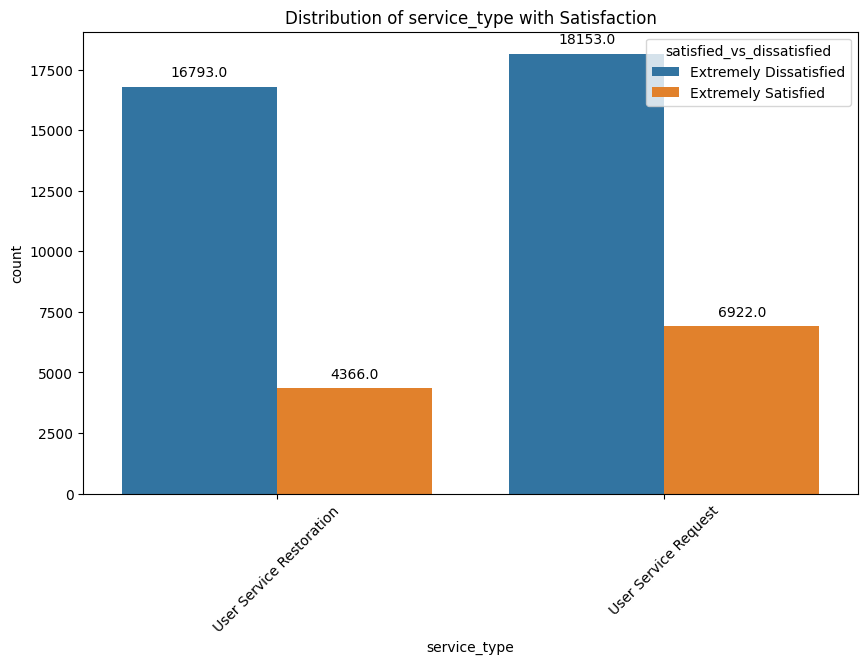

In [ ]:
categorical_cols = ['service_type']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, hue='satisfied_vs_dissatisfied', data=Master_table)
    plt.title(f'Distribution of {col} with Satisfaction')
    plt.xticks(rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

(User Service Restoration): Extremely Dissatisfied (16793): This suggests that a significant number of incidents categorized under "User Service Restoration" resulted in extreme dissatisfaction. It could be indicative of challenges or delays in restoring user services, leading to a negative impact on user experience.
Extremely Satisfied (4366): On the positive side, there are incidents within this service type that resulted in extreme satisfaction. This could represent successful and prompt resolution of service restoration issues for a subset of incidents.
User Service Request:Extremely Dissatisfied (18153): A substantial number of incidents categorized under "User Service Request" resulted in extreme dissatisfaction. This may indicate challenges in meeting user expectations or addressing service requests effectively.

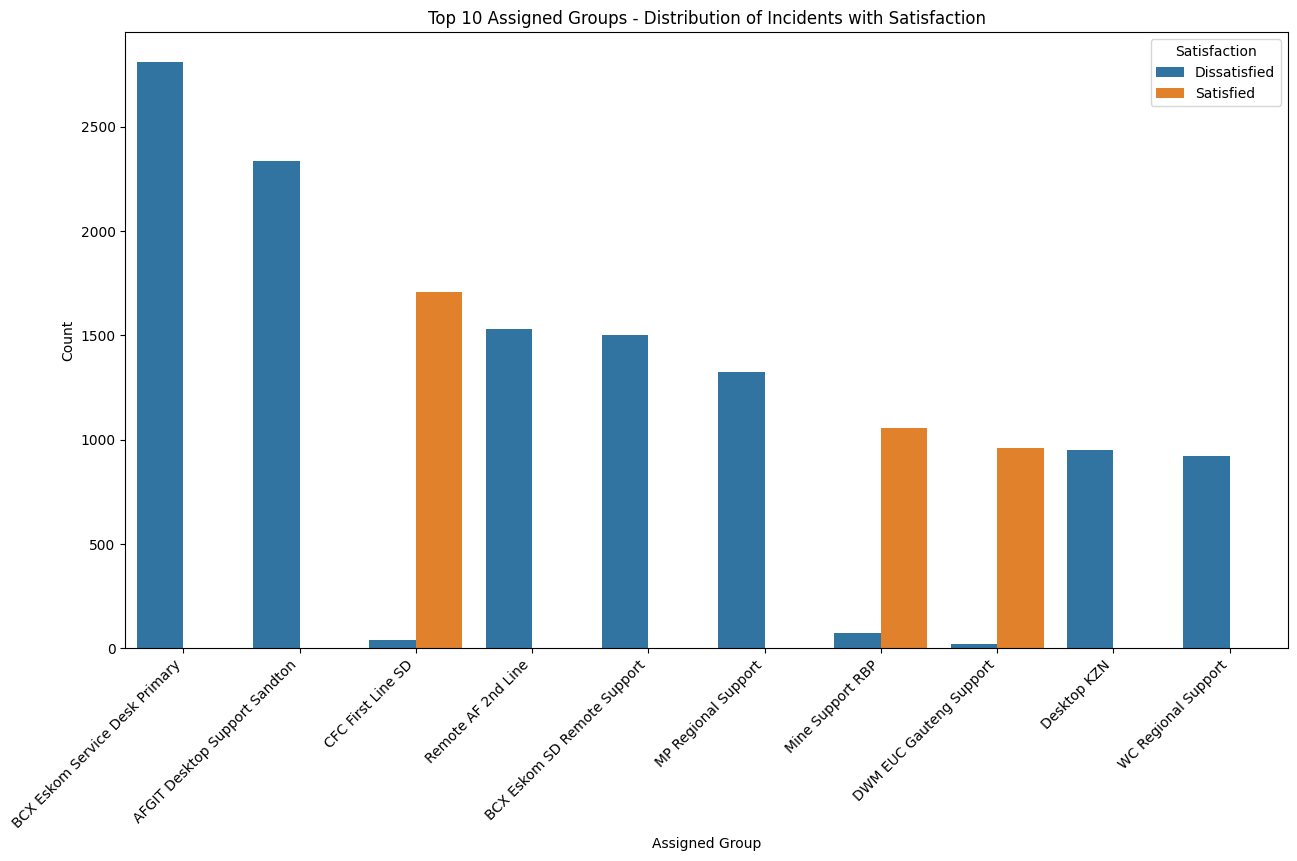

Incident Counts by Assigned Group and Satisfaction Level:
                    assigned_group satisfied_vs_dissatisfied  count
0    AFGIT Desktop Support Sandton    Extremely Dissatisfied   2335
1      BCX Eskom SD Remote Support    Extremely Dissatisfied   1500
2   BCX Eskom Service Desk Primary    Extremely Dissatisfied   2812
3                CFC First Line SD    Extremely Dissatisfied     38
4                CFC First Line SD       Extremely Satisfied   1709
5          DWM EUC Gauteng Support    Extremely Dissatisfied     22
6          DWM EUC Gauteng Support       Extremely Satisfied    962
7                      Desktop KZN    Extremely Dissatisfied    952
8                      Desktop KZN       Extremely Satisfied      1
9              MP Regional Support    Extremely Dissatisfied   1323
10                Mine Support RBP    Extremely Dissatisfied     73
11                Mine Support RBP       Extremely Satisfied   1056
12              Remote AF 2nd Line    Extremely Dissatisfi

In [ ]:
top_n_groups = 10

# Get the top assigned groups
top_assigned_groups = Master_table['assigned_group'].value_counts().sort_values(ascending=False).nlargest(top_n_groups).index

# Filter the dataframe for the selected groups
filtered_df = Master_table[Master_table['assigned_group'].isin(top_assigned_groups)]

# Get the order for the x-axis based on the count of each group in ascending order
group_order = filtered_df['assigned_group'].value_counts().index

# Plot the count distribution
plt.figure(figsize=(15, 8))
sns.countplot(x='assigned_group', hue='satisfied_vs_dissatisfied', data=filtered_df, order=group_order)
plt.title(f'Top {top_n_groups} Assigned Groups - Distribution of Incidents with Satisfaction')
plt.xlabel('Assigned Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction', loc='upper right', labels=['Dissatisfied', 'Satisfied'])
plt.show()

# Group the filtered DataFrame by 'assigned_group' and 'satisfied_vs_dissatisfied', then count the occurrences
grouped_counts = filtered_df.groupby(['assigned_group', 'satisfied_vs_dissatisfied']).size().reset_index(name='count')

# Print the resulting DataFrame
print("Incident Counts by Assigned Group and Satisfaction Level:")
print(grouped_counts)

The count plot of incidents by assigned groups involves understanding the distribution of incidents across different groups and how satisfaction levels vary within those groups. This gives a detailed breakdown of the number of incidents for each assigned group, providing an overview of their involvement in handling different issues.The graph shows that there are only CFC First Line SD, Mine Support RBP and DWM EUC Gauteng Support that yielded satisfactory incidents resolutions, however other assigned groups yielded extremely dissatisfied incidents.

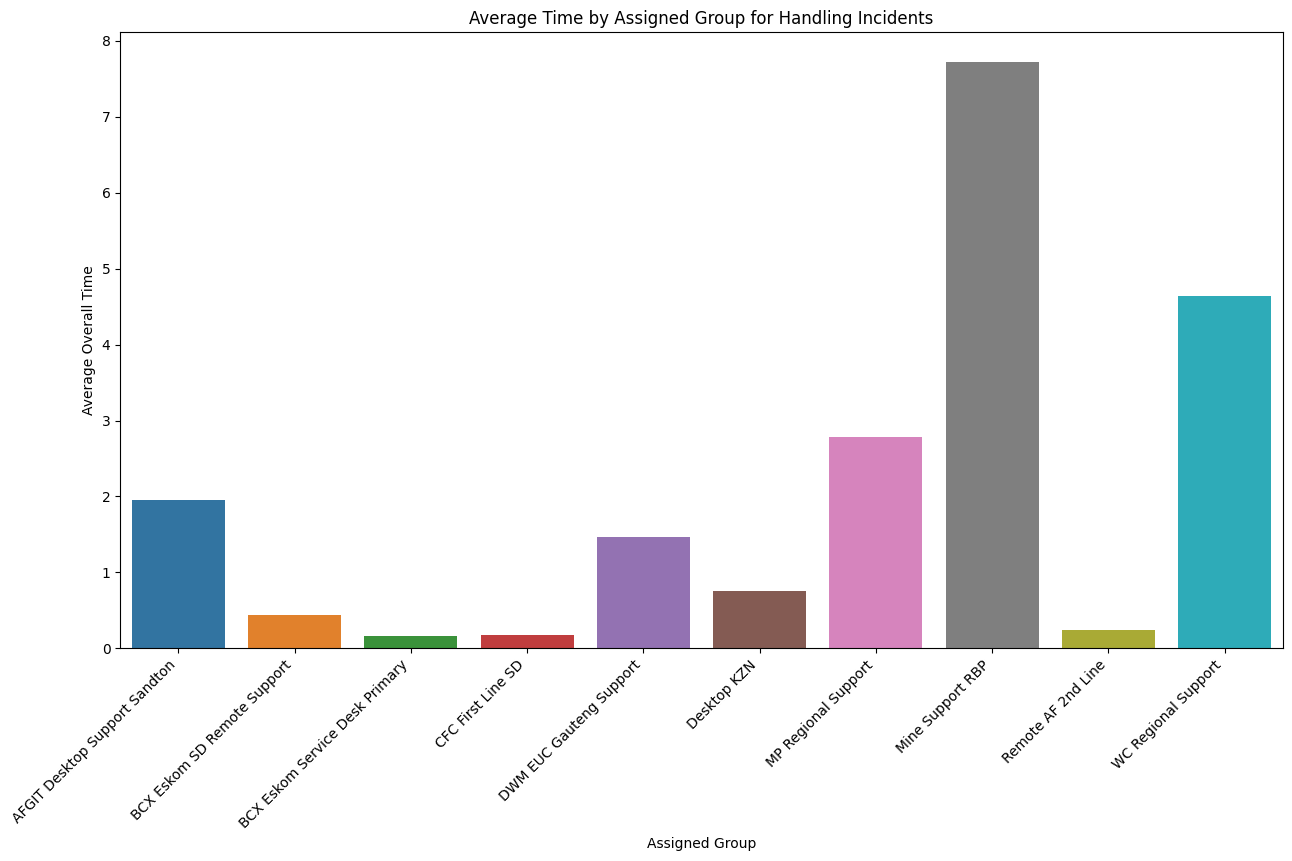

In [ ]:
# Group the filtered DataFrame by 'assigned_group' and calculate the average overall time
average_time_by_group = filtered_df.groupby('assigned_group')['overall_time'].mean().reset_index()

# Plot the average time distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='assigned_group', y='overall_time', data=average_time_by_group)
plt.title(f'Average Time by Assigned Group for Handling Incidents')
plt.xlabel('Assigned Group')
plt.ylabel('Average Overall Time')
plt.xticks(rotation=45, ha='right')
plt.show()

The assigned group that takes the most average time for incident resolution is Mine support RBP with approximately 8 days followed by WC Regional support with approximately 5 days.

In [ ]:
Master_table['Sentiment'].value_counts()

Neutral     34659
Positive    10659
Negative      909
Name: Sentiment, dtype: int64

In [ ]:
negative_sentiment = 'Negative'
filtered_sentiment = Master_table[Master_table['Sentiment']== negative_sentiment]
counts = filtered_sentiment['Sentiment'].groupby(filtered_sentiment['assignee']).count()
top_six_employees_sentiments = counts.sort_values(ascending = False).head(6)
print(top_six_employees_sentiments)

assignee
Michael Ralephenya    33
RESHMA MAKHAN         29
Jabulile J Maseko     23
Kabelo Mafikeng       20
Simon Kamenga         18
Sydney Ramatsetse     16
Name: Sentiment, dtype: int64


In [ ]:
positive_sentiment = 'Positive'
filtered_sentiment = Master_table[Master_table['Sentiment']== positive_sentiment]
counts = filtered_sentiment['Sentiment'].groupby(filtered_sentiment['assignee']).count()
top_six_employees_sentiments = counts.sort_values(ascending = False).head(6)
print(top_six_employees_sentiments)

assignee
Tracy Claasen        213
Wendy Jackson        186
Manuel Sefuthi       183
Leigh-Anne Thomas    162
DEVAN PADIACHY       162
Nicholas Nkambule    152
Name: Sentiment, dtype: int64


In [ ]:
neutral_sentiment = 'Neutral'
filtered_sentiment = Master_table[Master_table['Sentiment']== neutral_sentiment]
counts = filtered_sentiment['Sentiment'].groupby(filtered_sentiment['assignee']).count()
top_six_employees_sentiments = counts.sort_values(ascending = False).head(6)
print(top_six_employees_sentiments)

assignee
Patrick Thokozane Dlamini    540
Themba Simelane              534
Thabang Motsoeneng           510
Generic IntegrationUser      490
Faith Kgati                  415
Hope Moichela                347
Name: Sentiment, dtype: int64


In [ ]:
priority_counts = Master_table['priority'].value_counts()

# Display the counts for each priority level
print(priority_counts)

Medium      27921
Low         17812
High          463
Critical       38
Name: priority, dtype: int64


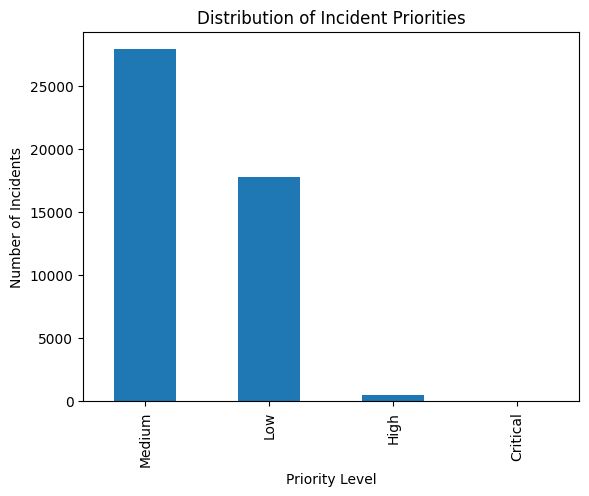

In [ ]:
# Plot the counts for each priority level
priority_counts.plot(kind='bar')
plt.xlabel('Priority Level')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incident Priorities')
plt.show()

In [ ]:
satisfaction = 'Extremely Satisfied'
filtered_satisfaction = Master_table[Master_table['satisfied_vs_dissatisfied']== satisfaction]
counts = filtered_satisfaction['satisfied_vs_dissatisfied'].groupby(filtered_satisfaction['assignee']).count()
top_six_satisfactions= counts.sort_values(ascending = False).head(6)
print(top_six_satisfactions)


assignee
Buhle Nkwezane            306
Lawrence Ramalepe         288
Konanani Nechibazavula    285
Oscar Baloyi              277
Kingsley Mashabe          255
Fhumulani Mashavha        253
Name: satisfied_vs_dissatisfied, dtype: int64


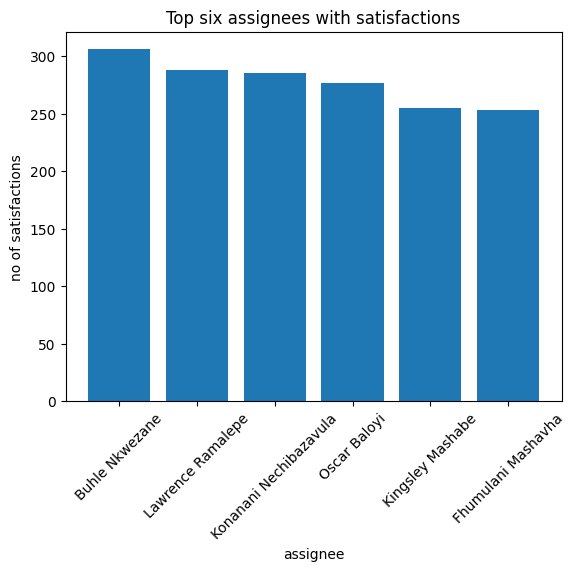

In [ ]:
plt.bar(top_six_satisfactions.index,top_six_satisfactions.values)
plt.xlabel('assignee')
plt.ylabel('no of satisfactions')
plt.title('Top six assignees with satisfactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dissatisfaction = 'Extremely Dissatisfied'
filtered_dissatisfaction = Master_table[Master_table['satisfied_vs_dissatisfied']== dissatisfaction]
count = filtered_dissatisfaction['satisfied_vs_dissatisfied'].groupby(filtered_dissatisfaction['assignee']).count()
top_six_dissatisfactions = count.sort_values(ascending = False).head(6)
print(top_six_dissatisfactions)

assignee
Patrick Thokozane Dlamini    540
Themba Simelane              534
Thabang Motsoeneng           510
Generic IntegrationUser      490
Faith Kgati                  415
Hope Moichela                347
Name: satisfied_vs_dissatisfied, dtype: int64


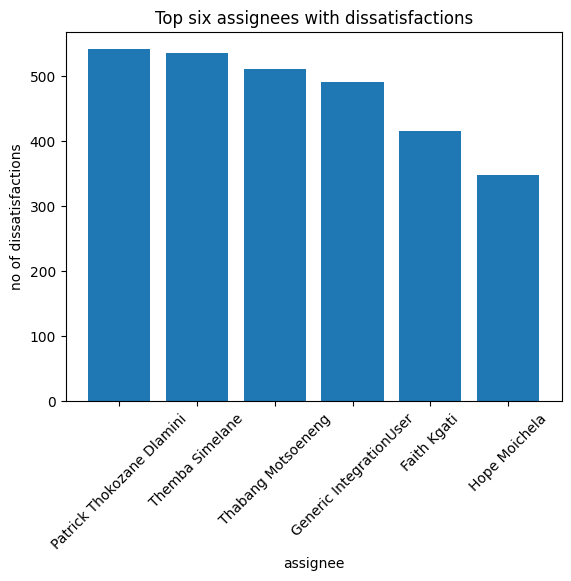

In [ ]:
plt.bar(top_six_dissatisfactions.index,top_six_dissatisfactions.values)
plt.xlabel('assignee')
plt.ylabel('no of dissatisfactions')
plt.title('Top six assignees with dissatisfactions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Master_table['last_modified_date'] = pd.to_datetime(Master_table['last_modified_date'])
Master_table['reported_date'] = pd.to_datetime(Master_table['reported_date'])
Master_table['date_difference_hours'] = (Master_table['last_modified_date'] - Master_table['reported_date']).dt.total_seconds() / 3600
Master_table['date_difference_hours']

0         122.207778
1          27.327500
2         142.028889
3         149.728056
4        2883.128333
            ...     
99738     263.518611
99739     124.654722
99740     123.398611
99741    9249.391944
99742    5359.341111
Name: date_difference_hours, Length: 99743, dtype: float64

In [ ]:
avg_resolution_time = Master_table.groupby('priority')['date_difference_hours'].mean()
avg_resolution_time

priority
Critical     214.793385
High         352.639790
Low         1043.509580
Medium       764.299731
Name: date_difference_hours, dtype: float64

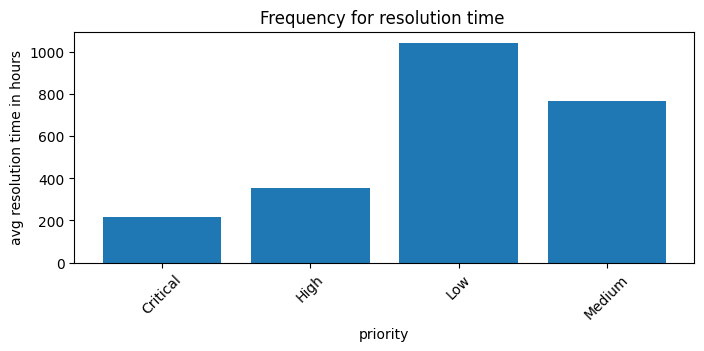

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(avg_resolution_time.index, avg_resolution_time.values)
plt.xlabel('priority')
plt.ylabel('avg resolution time in hours')
plt.title('Frequency for resolution time ')
plt.xticks(rotation=45)
plt.show()

In [ ]:
avg_time_sentiment = Master_table.groupby('Sentiment')['date_difference_hours'].mean()
avg_time_sentiment

Sentiment
Negative    943.906020
Neutral     973.953332
Positive    514.383031
Name: date_difference_hours, dtype: float64

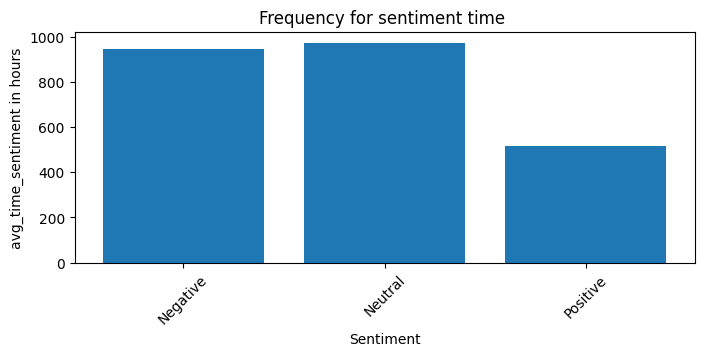

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(avg_time_sentiment.index, avg_time_sentiment.values)
plt.xlabel('Sentiment')
plt.ylabel('avg_time_sentiment in hours')
plt.title('Frequency for sentiment time ')
plt.xticks(rotation=45)
plt.show()

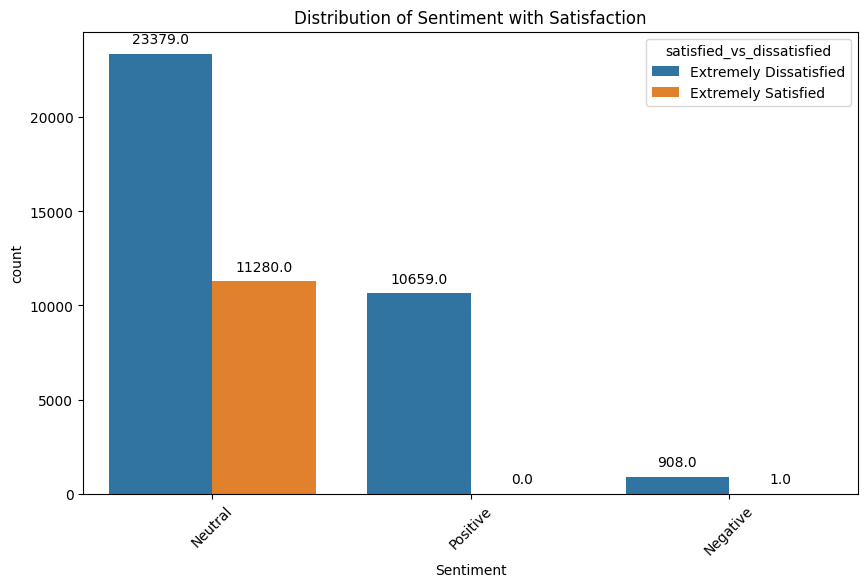

In [ ]:
categorical_cols = ['Sentiment']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, hue='satisfied_vs_dissatisfied', data=Master_table)
    plt.title(f'Distribution of {col} with Satisfaction')
    plt.xticks(rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

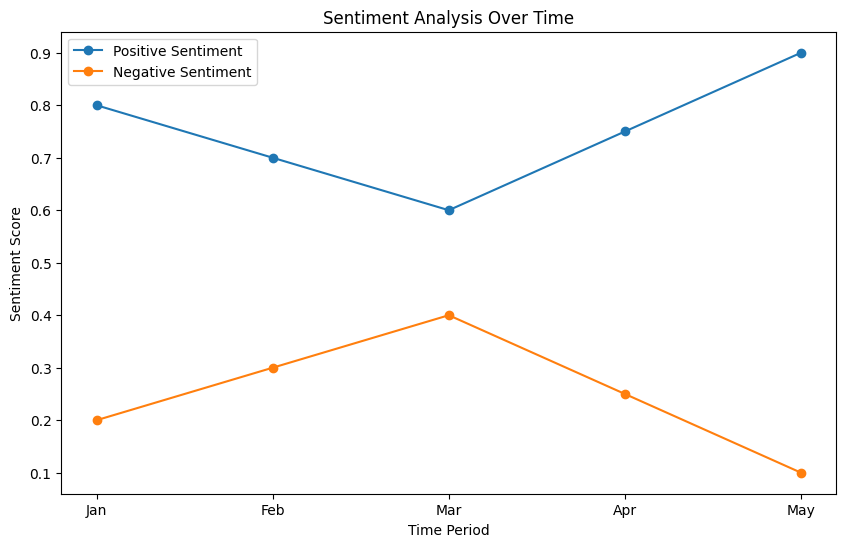

In [ ]:
# Example sentiment data
time_periods = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
positive_sentiment = [0.8, 0.7, 0.6, 0.75, 0.9]
negative_sentiment = [0.2, 0.3, 0.4, 0.25, 0.1]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(time_periods, positive_sentiment, label='Positive Sentiment', marker='o')
plt.plot(time_periods, negative_sentiment, label='Negative Sentiment', marker='o')

# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Over Time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
avg_time_source = Master_table.groupby('reported_source')['date_difference_hours'].mean()
avg_time_source = avg_time_source.sort_values(ascending = False).head(8)
print(avg_time_source)

reported_source
Systems Management    1393.115694
Self Service          1357.316204
Direct Input          1009.427676
Email                  906.023053
Phone                  684.220087
Web                    396.773605
Chat                   294.125167
Other                  270.874458
Name: date_difference_hours, dtype: float64


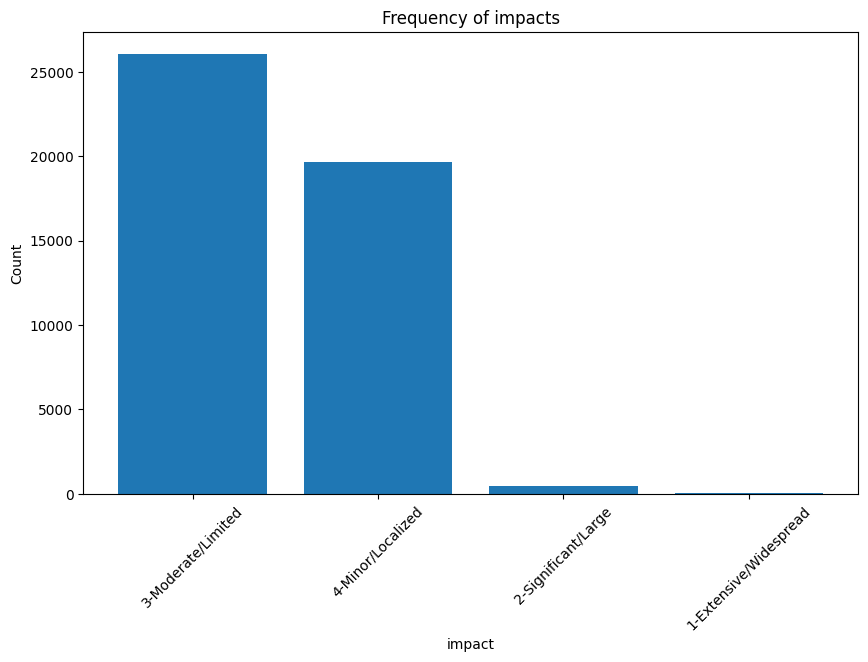

In [ ]:
category_counts = Master_table['impact'].value_counts().head(6)
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('impact')
plt.ylabel('Count')
plt.title('Frequency of impacts')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Master_table['impact'].value_counts()

3-Moderate/Limited        26048
4-Minor/Localized         19679
2-Significant/Large         463
1-Extensive/Widespread       37
Name: impact, dtype: int64

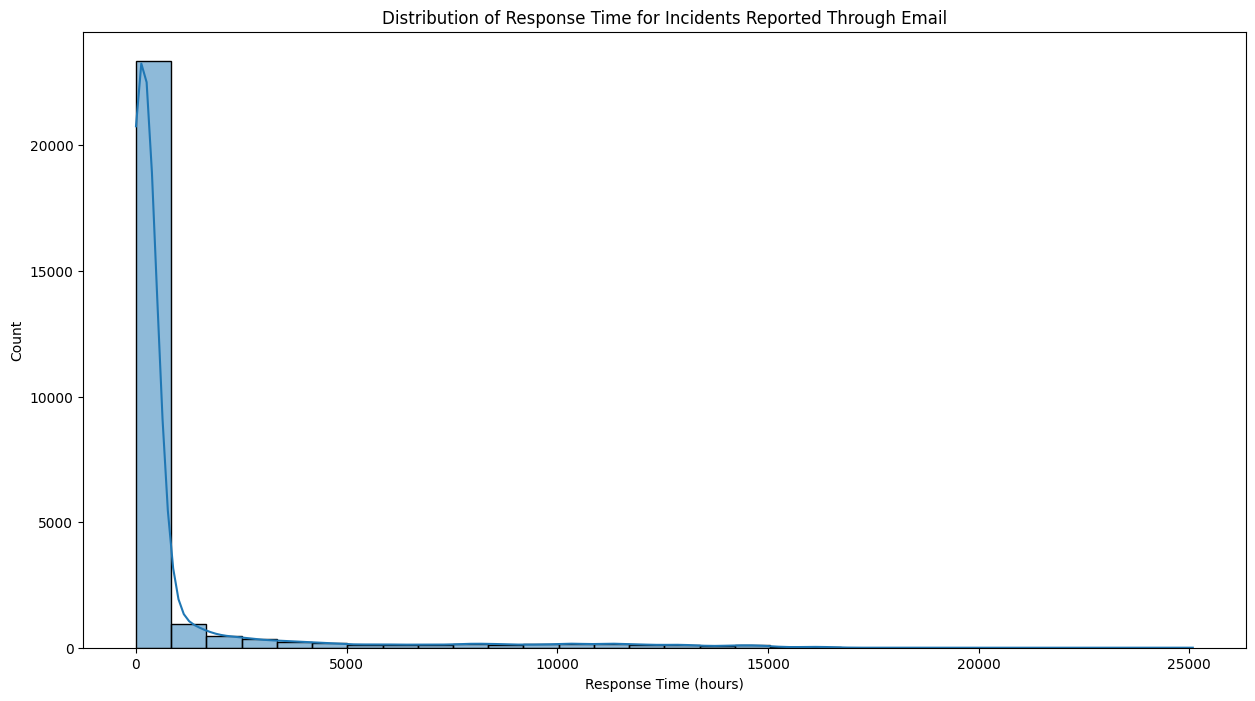

In [ ]:
# Filter the DataFrame for incidents reported through email
email_incidents = Master_table[Master_table['reported_source'] == 'Email'].copy()

# Convert 'reported_date' and 'last_modified_date' to datetime objects
email_incidents['reported_date'] = pd.to_datetime(email_incidents['reported_date'])
email_incidents['last_modified_date'] = pd.to_datetime(email_incidents['last_modified_date'])

# Calculate the response time by subtracting 'reported_date' from 'last_modified_date'
email_incidents['response_time'] = (email_incidents['last_modified_date'] - email_incidents['reported_date']).dt.total_seconds() / (60 * 60)  # Convert to hours

# Plot the distribution of response time
plt.figure(figsize=(15, 8))
sns.histplot(email_incidents['response_time'], bins=30, kde=True)
plt.title('Distribution of Response Time for Incidents Reported Through Email')
plt.xlabel('Response Time (hours)')
plt.ylabel('Count')
plt.show()

The histogram illustrates the distribution of response times for incidents reported through email. Each bar represents a range of response times, and the height of the bars indicates the count of incidents falling within each range. This Calculates the response time in hours for incidents reported through email , it provide insights into how quickly incidents reported through emaill are typically responded to. Most incidents were resolved just under 1000 hours. In conclusion,  most incidents will require just under 1000 hours to be resolved.  

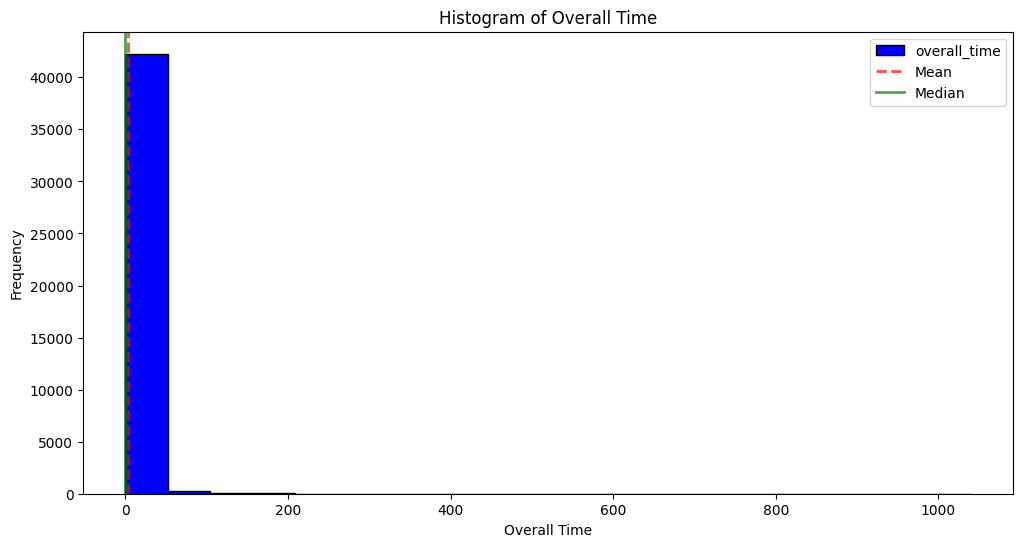

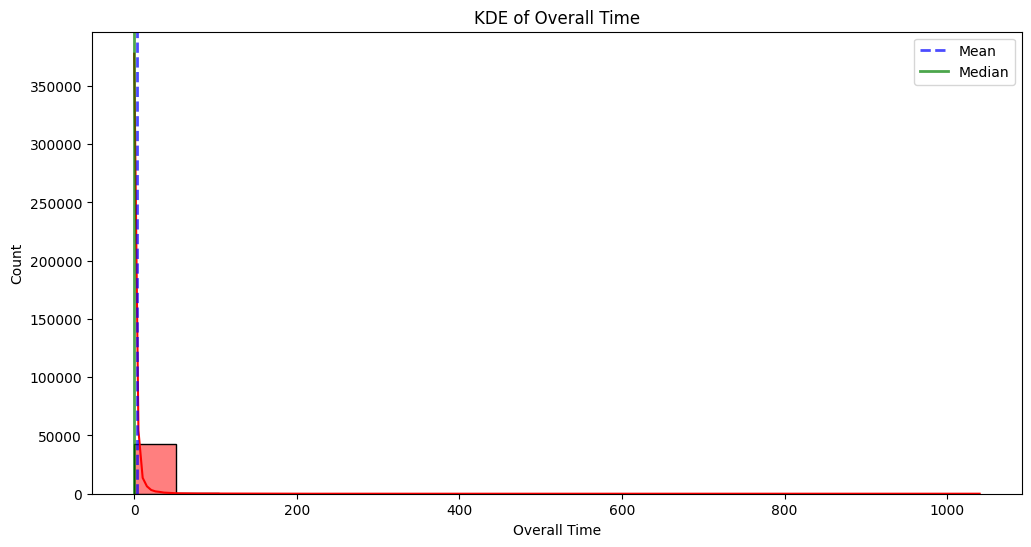

Min Overall Time: 0.0 -- Max Overall Time: 1040.0
Mean Overall Time: 2.89 -- Median Overall Time: 0.00


In [ ]:
# Calculate mean and median
overall_time_mean = Master_table['overall_time'].mean()
overall_time_median = Master_table['overall_time'].median()

# Plot Histogram
plt.figure(figsize=(12, 6))  # Set a suitable figure size
Master_table['overall_time'].plot(kind='hist', bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Overall Time')
plt.xlabel('Overall Time')
plt.axvline(overall_time_mean, color='red', linestyle='dashed', linewidth=2, label='Mean', alpha=0.7)
plt.axvline(overall_time_median, color='green', linestyle='solid', linewidth=2, label='Median', alpha=0.7)
plt.legend()
plt.show()

# Plot KDE
plt.figure(figsize=(12, 6))  # Set a suitable figure size
sns.histplot(Master_table['overall_time'], bins=20, kde=True, color='red')
plt.title('KDE of Overall Time')
plt.xlabel('Overall Time')
plt.axvline(overall_time_mean, color='blue', linestyle='dashed', linewidth=2, label='Mean', alpha=0.7)
plt.axvline(overall_time_median, color='green', linestyle='solid', linewidth=2, label='Median', alpha=0.7)
plt.legend()
plt.show()

# Print summary information
print(f"Min Overall Time: {Master_table['overall_time'].min()} -- Max Overall Time: {Master_table['overall_time'].max()}")
print(f"Mean Overall Time: {overall_time_mean:.2f} -- Median Overall Time: {overall_time_median:.2f}")

The histogram and KDE plot show a right-skewed distribution, indicating that most 'overall_time' values are concentrated on the lower end, with a long tail to the right. The mean is higher than the median, suggesting positive skewness. Most incidents have relatively short overall times, but there is a subset of incidents with longer overall times, contributing to the right-skewed distribution. Outliers or incidents with exceptionally long overall times may be present in the dataset.

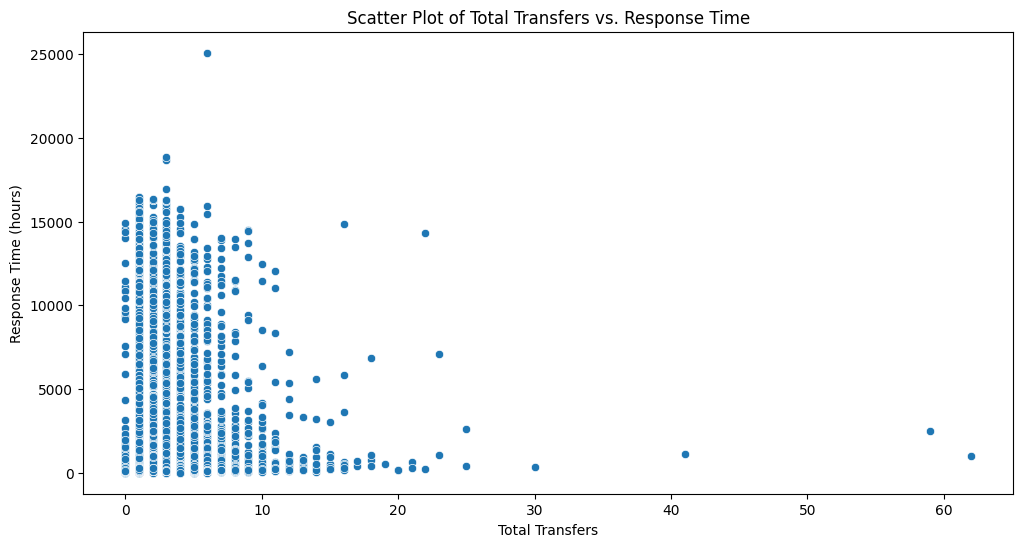

Correlation between 'Total Transfers' and 'Response Time': -0.03
There is a negative correlation between the total number of transfers and response time.
As the total transfers increase, the response time tends to decrease.
It's important to consider other factors that may influence response time, and further analysis may be needed.


In [ ]:
# Plot a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=email_incidents['total_transfers'], y=email_incidents['response_time'])
plt.title('Scatter Plot of Total Transfers vs. Response Time')
plt.xlabel('Total Transfers')
plt.ylabel('Response Time (hours)')
plt.show()

# Calculate correlation
correlation = email_incidents['total_transfers'].corr(email_incidents['response_time'])

# Provide interpretation and comments
print(f"Correlation between 'Total Transfers' and 'Response Time': {correlation:.2f}")

if correlation > 0:
    print("There is a positive correlation between the total number of transfers and response time.")
    print("As the total transfers increase, the response time tends to increase.")
elif correlation < 0:
    print("There is a negative correlation between the total number of transfers and response time.")
    print("As the total transfers increase, the response time tends to decrease.")
else:
    print("There appears to be no significant linear correlation between total transfers and response time.")

# Additional comments or insights based on the context of the data
print("It's important to consider other factors that may influence response time, and further analysis may be needed.")

From our correlation coefficiencies we can see that there exists a strong negative correlation between response time and date rated and date closed respectively

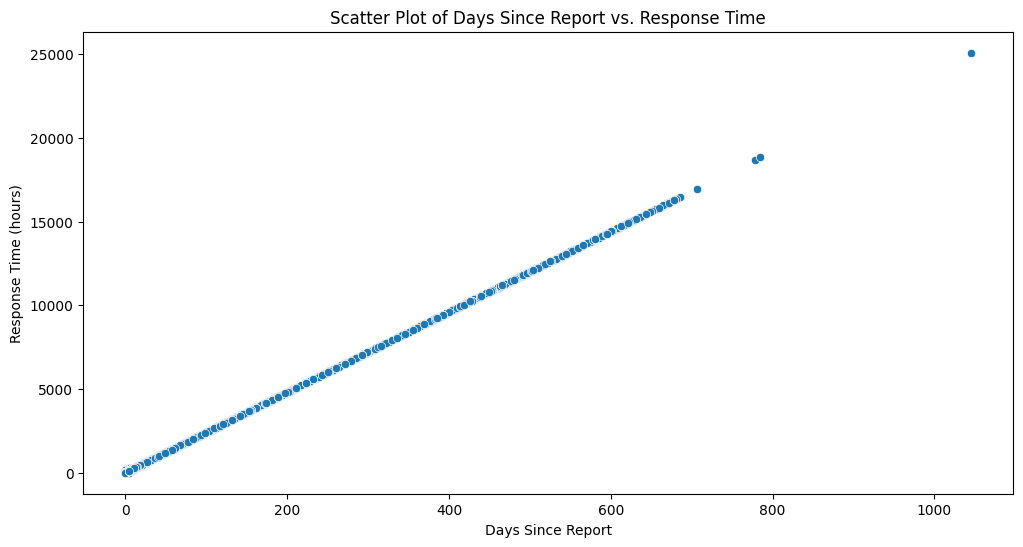

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_since_report', y='response_time', data=email_incidents)
plt.title('Scatter Plot of Days Since Report vs. Response Time')
plt.xlabel('Days Since Report')
plt.ylabel('Response Time (hours)')
plt.show()

This Suggests a positive linear relationship between 'Days Since Report' and 'Response Time'.  positive diagonal line from the bottom left to the top right suggests that incidents reported earlier tend to have longer response times, and incidents reported more recently tend to have shorter response times.

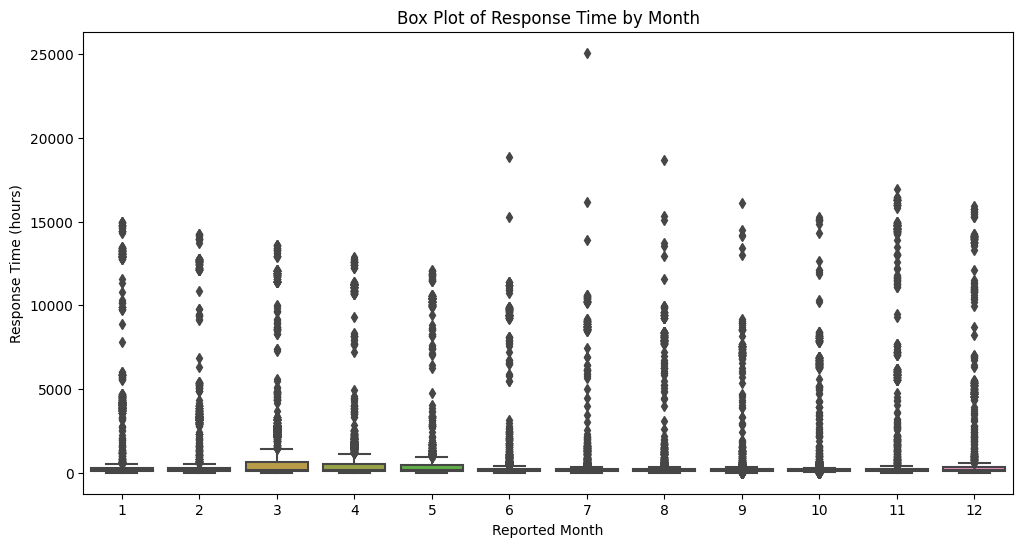

In [ ]:
# Suppress SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

#Extract additional time-based features, such as month, day of the week, or hour, to explore potential time trends.
email_incidents['reported_month'] = email_incidents['reported_date'].dt.month.copy()
email_incidents['reported_dayofweek'] = email_incidents['reported_date'].dt.dayofweek.copy()

# Reset the warning mode to default
pd.set_option('mode.chained_assignment', 'warn')
plt.figure(figsize=(12, 6))
sns.boxplot(x='reported_month', y='response_time', data=email_incidents)
plt.title('Box Plot of Response Time by Month')
plt.xlabel('Reported Month')
plt.ylabel('Response Time (hours)')
plt.show()

In [ ]:
#correlation_matrix = email_incidents.corr()
#print(correlation_matrix['response_time'].sort_values(ascending=False))

we used box plots to to visualize how response time varies over time. The boxes' size and position indicate the variability in response times for each month. If the boxes are consistently positioned and similar in size, it suggests consistent response times across months.
If there are variations in box size or position, it indicates differences in response times.

# Model Development

In [ ]:
# Check for missing values in your dataset
print(Master_table.isnull().sum())


Unnamed: 0                           0
incident_number                      0
assignee                         53510
assignee_login_id                53510
assigned_group                   53509
contact_company                  53509
last_modified_date               53509
submit_date                      53509
reported_date                    53509
major_incident                   53509
priority                         53509
product_categorization_tier_1    53510
re_opened_date                   99437
region                           53979
reported_source                  53509
service_type                     53509
serviceci                        53509
site                             55165
site_group                       54033
status                           53509
total_transfers                  53509
z1d_template_name                53961
is_closed                        53509
is_24h_sla                       53509
data_source                      53509
company                  

In [ ]:
Master_table.head()

,Unnamed: 0,incident_number,assignee,assignee_login_id,assigned_group,contact_company,last_modified_date,submit_date,reported_date,major_incident,priority,product_categorization_tier_1,re_opened_date,region,reported_source,service_type,serviceci,site,site_group,status,total_transfers,z1d_template_name,is_closed,is_24h_sla,data_source,company,date_rated,satisfied,dissatisfied,satisfied_vs_dissatisfied,answer_sheet_date_rated,date_closed,last_resolved_date,answer_sheet_assignee,impact,Sentiment,Dominant_Topic,days_since_report,overall_time,incidents_count,date_difference_hours
0,0,INC000031465842,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2023-04-03 09:53:42+00:00,2023-03-29 07:44:10+00:00,2023-03-29 07:41:14+00:00,No,High,Application,NaN,KwaZulu-Natal,Phone,User Service Restoration,Hardware Service,NMR SAS,Durban,Closed,1.0,SASO BOS - Monitor faulty,True,True,incidents,Sasol Oil (Pty) Ltd,20230401,0,1,Extremely Dissatisfied,2023-05-01 00:00:00+00:00,20230403.0,2023-04-14 00:00:00+00:00,Msawenkosi Zuma,2-Significant/Large,Neutral,0.0,5.0,0.0,1.0,122.207778
1,1,INC000031508765,Eric Ramokgadi,nbc-ericr,NBCRFLI EUC Support,National Bargaining Council Road Freight Logis...,2023-04-04 10:46:54+00:00,2023-04-03 07:29:18+00:00,2023-04-03 07:27:15+00:00,No,Low,Network,NaN,Western Cape,Email,User Service Request,Network Service,NBCRFLI Cape Town,Parrow,Closed,1.0,NBC VPN Assist,True,False,request,National Bargaining Council Road Freight Logis...,20230406,0,1,Extremely Dissatisfied,2023-10-30 00:00:00+00:00,20230404.0,2023-10-30 00:00:00+00:00,Eric Ramokgadi,4-Minor/Localized,Neutral,0.0,1.0,1.0,3.0,27.327500
2,2,INC000031582492,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2023-04-17 09:28:52+00:00,2023-04-11 12:00:37+00:00,2023-04-11 11:27:08+00:00,No,High,Software,NaN,Gauteng,Phone,User Service Restoration,Application Service,Brodies SS SAS,Johannesburg,Closed,3.0,SASO POS - POS error,True,True,incidents,Sasol Oil (Pty) Ltd,20230412,0,1,Extremely Dissatisfied,2022-10-10 00:00:00+00:00,20230417.0,2022-10-07 00:00:00+00:00,Msawenkosi Zuma,2-Significant/Large,Neutral,0.0,5.0,0.0,1.0,142.028889
3,3,INC000030357959,Msawenkosi Zuma,msawenkosi.zuma@bcx.co.za,Stowe Winbranch,Sasol Oil (Pty) Ltd,2022-12-17 14:32:53+00:00,2022-12-11 08:54:11+00:00,2022-12-11 08:49:12+00:00,No,Medium,Application,NaN,Free State,Phone,User Service Restoration,Application Service,Route 7 SS SAS,Phuthaditjaba,Closed,1.0,SASO BOS - Price Error,True,False,incidents,Sasol Oil (Pty) Ltd,20221212,0,1,Extremely Dissatisfied,2023-02-12 00:00:00+00:00,20221217.0,2023-02-11 00:00:00+00:00,Msawenkosi Zuma,3-Moderate/Limited,Neutral,0.0,6.0,1.0,1.0,149.728056
4,4,INC000030998788,Johann Lingenfelder,johann.lingenfelder@bcx.co.za,SAP Security,National Bargaining Council Road Freight Logis...,2023-06-09 12:46:59+00:00,2023-02-09 09:40:30+00:00,2023-02-09 09:39:17+00:00,No,Low,Software,NaN,Gauteng,Email,User Service Request,SAP Service,NBCRFLI Braamfontein,Johannesburg,Closed,2.0,NBC SAP CO Assist,True,False,request,National Bargaining Council Road Freight Logis...,20230209,0,1,Extremely Dissatisfied,2023-02-09 00:00:00+00:00,20230214.0,2023-02-09 00:00:00+00:00,Johann Lingenfelder,4-Minor/Localized,Neutral,0.0,120.0,0.0,1.0,2883.128333


In [ ]:
Master_table.columns

Index(['Unnamed: 0', 'incident_number', 'assignee', 'assignee_login_id',
       'assigned_group', 'contact_company', 'last_modified_date',
       'submit_date', 'reported_date', 'major_incident', 'priority',
       'product_categorization_tier_1', 're_opened_date', 'region',
       'reported_source', 'service_type', 'serviceci', 'site', 'site_group',
       'status', 'total_transfers', 'z1d_template_name', 'is_closed',
       'is_24h_sla', 'data_source', 'company', 'date_rated', 'satisfied',
       'dissatisfied', 'satisfied_vs_dissatisfied', 'answer_sheet_date_rated',
       'date_closed', 'last_resolved_date', 'answer_sheet_assignee', 'impact',
       'Sentiment', 'Dominant_Topic', 'days_since_report', 'overall_time',
       'incidents_count', 'date_difference_hours'],
      dtype='object')

In [ ]:
Master_table['Dominant_Topic'].value_counts()

0.0    32653
3.0    10659
1.0     2531
2.0      384
Name: Dominant_Topic, dtype: int64

In [ ]:
# Categorical to Numerical
categorical_features = ['priority','service_type', 'status', 'data_source'
                ,'data_source','is_closed','is_24h_sla', 'impact','satisfied_vs_dissatisfied', 'Sentiment',
                        'region','product_categorization_tier_1','reported_source','total_transfers','serviceci']
le = LabelEncoder()

for categorical_feature in categorical_features:
    Master_table[categorical_feature] = le.fit_transform( Master_table[categorical_feature])

In [ ]:
Master_table = Master_table.fillna(0.0)

In [ ]:
Master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99743 entries, 0 to 99742
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     99743 non-null  int64  
 1   incident_number                99743 non-null  object 
 2   assignee                       99743 non-null  object 
 3   assignee_login_id              99743 non-null  object 
 4   assigned_group                 99743 non-null  object 
 5   contact_company                99743 non-null  object 
 6   last_modified_date             99743 non-null  object 
 7   submit_date                    99743 non-null  object 
 8   reported_date                  99743 non-null  object 
 9   major_incident                 99743 non-null  object 
 10  priority                       99743 non-null  int64  
 11  product_categorization_tier_1  99743 non-null  int64  
 12  re_opened_date                 99743 non-null 

In [ ]:
Master_table['site_group'].value_counts()

0.0              54033
Sandton           7421
Centurion         3565
Johannesburg      3388
Sunninghill       2065
                 ...  
Carnarvon            1
Wartburg             1
Melkbosstrand        1
Kiepersol            1
Walvis Bay           1
Name: site_group, Length: 423, dtype: int64

In [ ]:
#Drop columns with a high percentage of missing values or irrelevant for analysis
columns_to_drop = ['Unnamed: 0','incident_number','assignee','assignee_login_id', 'assigned_group',
                   'contact_company', 'last_modified_date','submit_date', 'reported_date', 'major_incident',
                   're_opened_date', 'answer_sheet_date_rated', 'date_closed', 'last_resolved_date', 'answer_sheet_assignee',
                   'overall_time','site','site_group','z1d_template_name','company',
                   'date_rated','answer_sheet_date_rated','date_closed','last_resolved_date', 'dissatisfied','satisfied']
Master_table = Master_table.drop(columns=columns_to_drop)


In [ ]:
Master_table.head()

,priority,product_categorization_tier_1,region,reported_source,service_type,serviceci,status,total_transfers,is_closed,is_24h_sla,data_source,satisfied_vs_dissatisfied,impact,Sentiment,Dominant_Topic,days_since_report,incidents_count,date_difference_hours
0,1,1,13,7,1,39,2,1,1,1,0,0,1,1,0.0,5.0,1.0,122.207778
1,2,22,26,3,0,61,2,1,1,0,1,0,3,1,0.0,1.0,3.0,27.327500
2,1,28,5,7,1,3,2,3,1,1,0,0,1,1,0.0,5.0,1.0,142.028889
3,3,1,4,7,1,3,2,1,1,0,0,0,2,1,0.0,6.0,1.0,149.728056
4,2,28,5,3,0,77,2,2,1,0,1,0,3,1,0.0,120.0,1.0,2883.128333


In [ ]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
columns_to_drop = ['satisfied_vs_dissatisfied']
X_train = Master_table.drop(columns=columns_to_drop)

In [ ]:
X_train

,priority,product_categorization_tier_1,region,reported_source,service_type,serviceci,status,total_transfers,is_closed,is_24h_sla,data_source,impact,Sentiment,Dominant_Topic,days_since_report,incidents_count,date_difference_hours
0,1,1,13,7,1,39,2,1,1,1,0,1,1,0.0,5.0,1.0,122.207778
1,2,22,26,3,0,61,2,1,1,0,1,3,1,0.0,1.0,3.0,27.327500
2,1,28,5,7,1,3,2,3,1,1,0,1,1,0.0,5.0,1.0,142.028889
3,3,1,4,7,1,3,2,1,1,0,0,2,1,0.0,6.0,1.0,149.728056
4,2,28,5,3,0,77,2,2,1,0,1,3,1,0.0,120.0,1.0,2883.128333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99738,3,9,13,3,1,81,2,2,1,0,0,2,1,0.0,10.0,1.0,263.518611
99739,3,28,5,3,1,93,2,3,1,0,0,2,1,0.0,5.0,1.0,124.654722
99740,2,28,5,8,0,84,2,4,1,0,1,3,1,0.0,5.0,1.0,123.398611
99741,2,10,5,3,0,87,2,1,1,0,1,3,1,0.0,385.0,1.0,9249.391944


In [ ]:
y_train = Master_table['satisfied_vs_dissatisfied']

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
99738    0
99739    0
99740    0
99741    0
99742    0
Name: satisfied_vs_dissatisfied, Length: 99743, dtype: int64

In [ ]:
#y_pred = model.fit(X_train,y_train).predict(X_train)
#accuracy_score(y_pred,y_train)
#scores = cross_val_score(model, X_train, y_train, cv=10)
#print(scores)
#print(scores.mean())

In [ ]:
X = Master_table.drop('satisfied_vs_dissatisfied', axis=1)
y = Master_table['satisfied_vs_dissatisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()

]
accuracy_scores = []
training_times = []

# Train and evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Print the scores
    print(f"Accuracy: {accuracy}")
    print("Precision:")
    print(precision)
    print("F1 Score:")
    print(f1)
    print("-----------------------------------")

Accuracy: 0.734573161561983
Precision:
[0.74210276 0.59904762]
F1 Score:
[0.84120558 0.19197314]
-----------------------------------
Accuracy: 0.8121209083162063
Precision:
[0.80203275 0.89191603]
F1 Score:
[0.88344321 0.51588737]
-----------------------------------
Accuracy: 0.8159306230888766
Precision:
[0.80421279 0.90852298]
F1 Score:
[0.88579959 0.52582645]
-----------------------------------
Accuracy: 0.8064063361572008
Precision:
[0.79871303 0.8674429 ]
F1 Score:
[0.8799204  0.50077559]
-----------------------------------
Accuracy: 0.8205423830768459
Precision:
[0.80893893 0.90689801]
F1 Score:
[0.88823676 0.54487668]
-----------------------------------


# UpSampling

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]
multiplier = len(majority_class) // len(minority_class)
duplicated_minority_class = pd.concat([minority_class] * multiplier, ignore_index=True)
remaining_samples = len(majority_class) % len(minority_class)
duplicated_minority_class = pd.concat([duplicated_minority_class, minority_class.sample(remaining_samples)], ignore_index=True)

# Combine the majority class with the duplicated minority class
X_train_balanced = pd.concat([majority_class, duplicated_minority_class], ignore_index=True)
y_train_balanced = pd.concat([pd.Series([0] * len(majority_class)), pd.Series([1] * len(duplicated_minority_class))], ignore_index=True)

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]
accuracy_scores = []
training_times = []

# Train and evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(X_train_balanced,y_train_balanced)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Print the scores
    print(f"Accuracy: {accuracy}")
    print("Precision:")
    print(precision)
    print("F1 Score:")
    print(f1)
    print("-----------------------------------")

Accuracy: 0.47917188831520374
Precision:
[0.92285238 0.3387448 ]
F1 Score:
[0.46003534 0.49699845]
-----------------------------------
Accuracy: 0.5930623088876635
Precision:
[0.96028513 0.4       ]
F1 Score:
[0.61923077 0.56303154]
-----------------------------------
Accuracy: 0.598225474961151
Precision:
[0.9732156  0.40451574]
F1 Score:
[0.62266372 0.57040253]
-----------------------------------
Accuracy: 0.584139555867462
Precision:
[0.98980567 0.39784946]
F1 Score:
[0.59969118 0.56733076]
-----------------------------------
Accuracy: 0.5995789262619681
Precision:
[0.99207559 0.40718608]
F1 Score:
[0.6197639  0.57713076]
-----------------------------------


# DownSampling

In [ ]:
majority_class = Master_table[Master_table['satisfied_vs_dissatisfied'] == 0]
minority_class = Master_table[Master_table['satisfied_vs_dissatisfied'] == 1]

In [ ]:
majority_class.count()

priority                         72816
product_categorization_tier_1    72816
region                           72816
reported_source                  72816
service_type                     72816
serviceci                        72816
status                           72816
total_transfers                  72816
is_closed                        72816
is_24h_sla                       72816
data_source                      72816
satisfied_vs_dissatisfied        72816
impact                           72816
Sentiment                        72816
Dominant_Topic                   72816
days_since_report                72816
incidents_count                  72816
date_difference_hours            72816
dtype: int64

In [ ]:
minority_class.count()

priority                         26927
product_categorization_tier_1    26927
region                           26927
reported_source                  26927
service_type                     26927
serviceci                        26927
status                           26927
total_transfers                  26927
is_closed                        26927
is_24h_sla                       26927
data_source                      26927
satisfied_vs_dissatisfied        26927
impact                           26927
Sentiment                        26927
Dominant_Topic                   26927
days_since_report                26927
incidents_count                  26927
date_difference_hours            26927
dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
downsampled_majority = resample(majority_class,
                               replace=False,
                               n_samples=len(minority_class),
                               random_state=42)

In [ ]:
balanced_data = pd.concat([downsampled_majority, minority_class])

In [ ]:
balanced_data.shape

(53854, 18)

In [ ]:
balanced_data[balanced_data['satisfied_vs_dissatisfied']==0].shape

(26927, 18)

In [ ]:
balanced_data[balanced_data['satisfied_vs_dissatisfied']==1].shape

(26927, 18)

In [ ]:
balanced_data.head()

,priority,product_categorization_tier_1,region,reported_source,service_type,serviceci,status,total_transfers,is_closed,is_24h_sla,data_source,satisfied_vs_dissatisfied,impact,Sentiment,Dominant_Topic,days_since_report,incidents_count,date_difference_hours
41459,4,36,29,13,2,97,6,31,2,2,2,0,4,3,0.0,0.0,0.0,0.000000
43169,4,36,29,13,2,97,6,31,2,2,2,0,4,3,0.0,0.0,0.0,0.000000
27378,4,36,29,13,2,97,6,31,2,2,2,0,4,3,0.0,0.0,0.0,0.000000
16655,4,36,29,13,2,97,6,31,2,2,2,0,4,3,0.0,0.0,0.0,0.000000
65206,2,28,17,12,0,32,2,6,1,0,1,0,3,2,3.0,100.0,6.0,2410.478611


In [ ]:
X = balanced_data.drop('satisfied_vs_dissatisfied', axis=1)
y = balanced_data['satisfied_vs_dissatisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]
accuracy_scores = []
training_times = []

# Train and evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Print the scores
    print(f"Accuracy: {accuracy}")
    print("Precision:")
    print(precision)
    print("F1 Score:")
    print(f1)
    print("-----------------------------------")

Accuracy: 0.6164701513322811
Precision:
[0.80009775 0.57340974]
F1 Score:
[0.44213369 0.70778807]
-----------------------------------
Accuracy: 0.7120972983009934
Precision:
[0.95051875 0.63980641]
F1 Score:
[0.60572155 0.77326899]
-----------------------------------
Accuracy: 0.714046977996472
Precision:
[0.96835183 0.63984169]
F1 Score:
[0.60472279 0.776     ]
-----------------------------------
Accuracy: 0.704298579519079
Precision:
[0.97178819 0.63151057]
F1 Score:
[0.58436644 0.77051661]
-----------------------------------
Accuracy: 0.7179463373874292
Precision:
[0.9805383  0.64205361]
F1 Score:
[0.60921019 0.7793434 ]
-----------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300]},
    'GradientBoostingClassifier': {'learning_rate': [0.1, 0.01, 0.001]},
    'XGBClassifier': {'learning_rate': [0.1, 0.01, 0.001]}
}

best_models = []
best_scores = []

for model_name, model in zip(['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBClassifier'], models):
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    best_models.append(best_model)
    best_scores.append(best_score)

    print(f"Best {model_name} parameters: {best_model.get_params()}")
    print(f"Best {model_name} score: {best_score}")
    print("-----------------------------------")

Best LogisticRegression parameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best LogisticRegression score: 0.6177611298044104
-----------------------------------
Best DecisionTreeClassifier parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Best DecisionTreeClassifier score: 0.7151080264024311
-----------------------------------
Best RandomForestClassifier parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_s

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [ ]:
num_folds = 10
# Create a cross-validation object (e.g., KFold)

kf = KFold(n_splits=num_folds, shuffle=True)

# Define F1 score as the scoring metric

f1_scorer = make_scorer(f1_score)

# Perform cross-validation and print the results

cross_val_results = cross_val_score(models[-2], X, y, cv=kf, scoring=f1_scorer, n_jobs=-1)

print("Cross-Validation Results:", cross_val_results)

print(f"Mean F1 Score: {cross_val_results.mean()}")

Cross-Validation Results: [0.77790869 0.76315025 0.76965239 0.77772945 0.76801406 0.77950808
 0.77752161 0.77934814 0.77082422 0.7669762 ]
Mean F1 Score: 0.7730633081801287


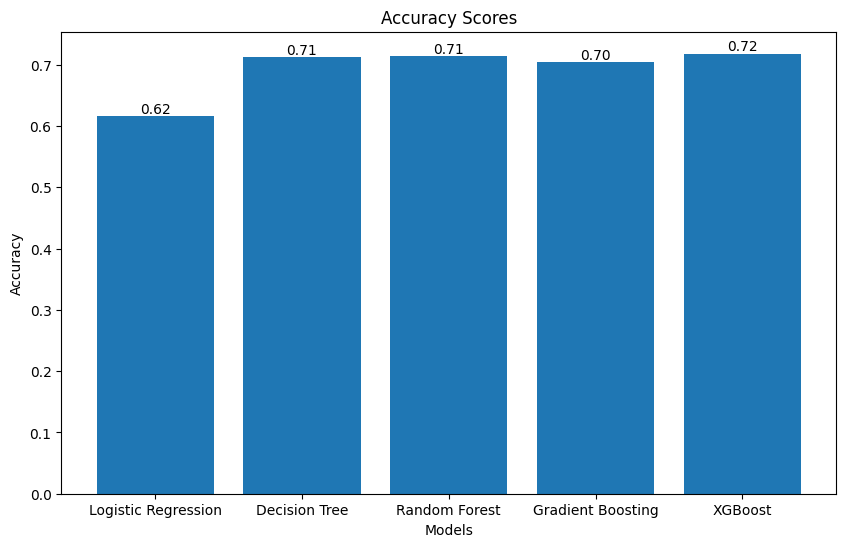

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's accuracy, precision, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    # Append the evaluation metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Plotting the evaluation metrics
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
x = range(len(labels))

# Accuracy bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, accuracy_scores)
plt.xticks(x, labels)
plt.title('Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [ ]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

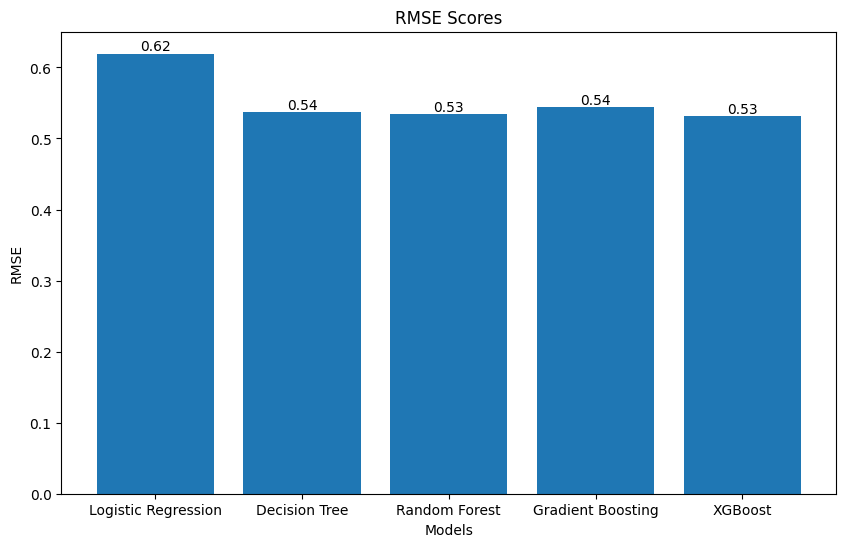

In [ ]:
rmse_scores = []

# Train and evaluate each model
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Plotting the RMSE scores
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_scores)
plt.xticks(x, labels)
plt.title('RMSE Scores')
plt.xlabel('Models')
plt.ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.2 MB/s eta 0:00:00


In [ ]:
import shap

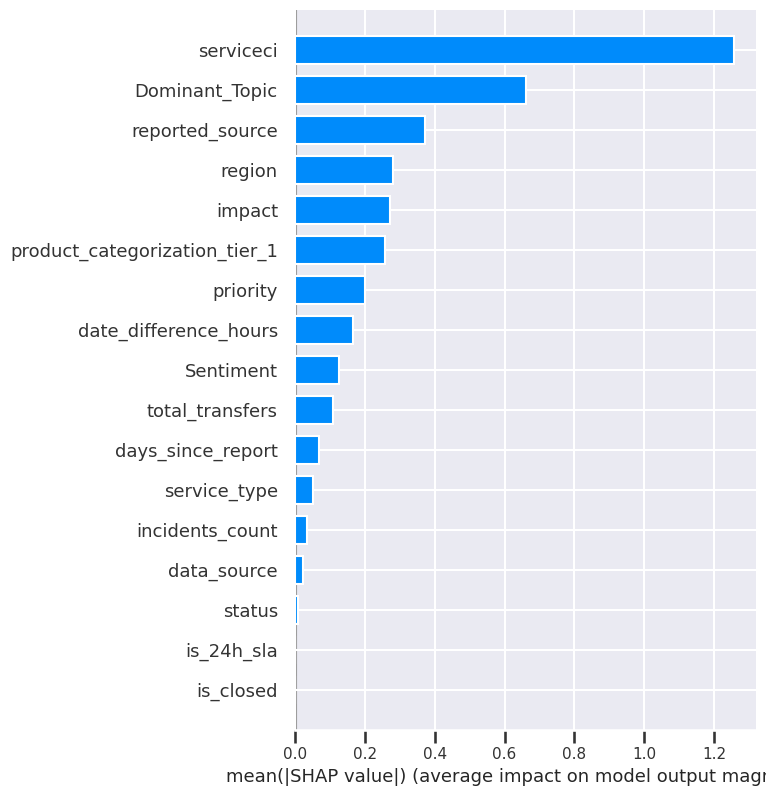

<Figure size 640x480 with 0 Axes>

In [ ]:
X = X_train
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

plt.figure(figsize=(8, 5))

# Set the plot style
sns.set(style='darkgrid', context='talk', palette='Set2')

# Generate the summary plot
shap.summary_plot(
    shap_values, X_train, feature_names=X.columns, plot_type="bar"# Adjust the scale as per your preference
)
plt.savefig('shap_values.png')
plt.show()

In [ ]:
shap_values_matrix = shap_values.reshape(1, -1)  # Reshape to a matrix

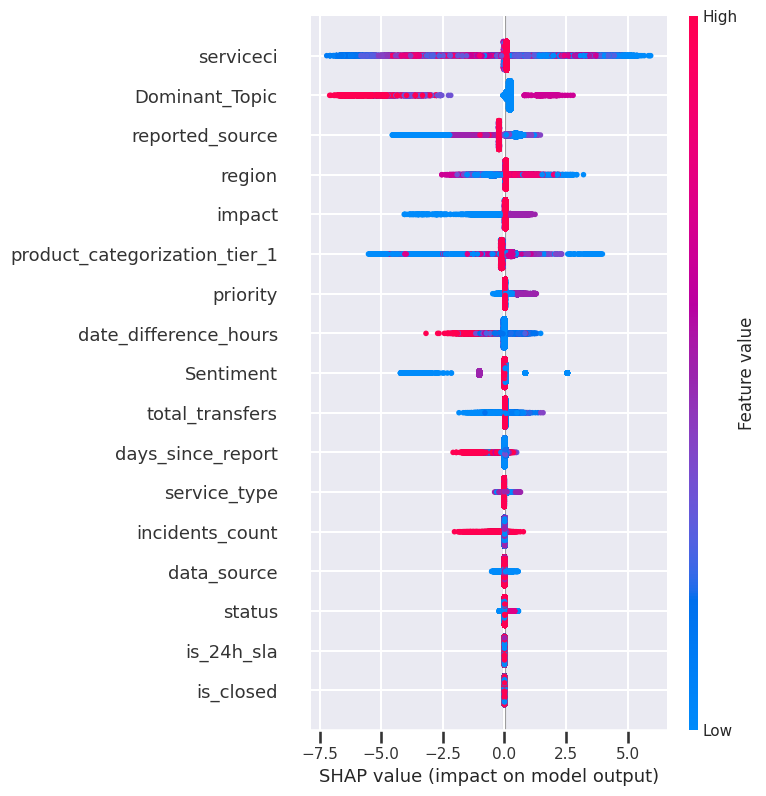

In [ ]:
shap.summary_plot(shap_values, features=X_train, plot_type='dot')

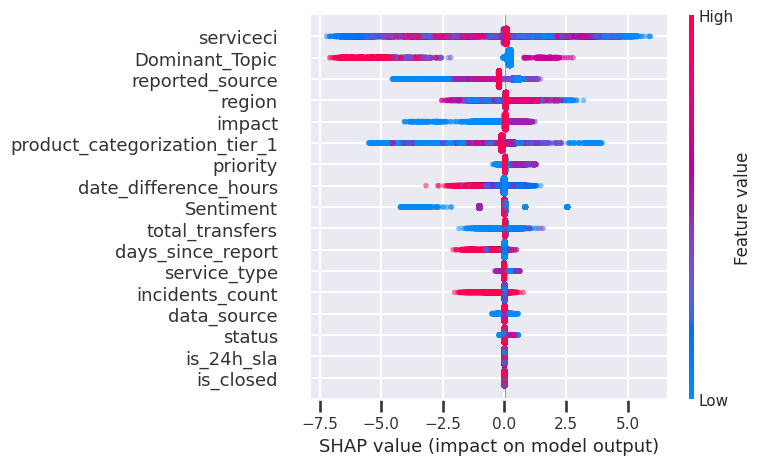

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import shap
from google.colab import files

# Assuming you have shap_values and X_train defined

# Create the SHAP summary plot
shap.summary_plot(shap_values, features=X_train, plot_type='dot', alpha=0.5, plot_size=(8, 5))

# Save the plot to a file
plt.savefig('google_plot.png', bbox_inches = 'tight')

# Download the file
files.download('google_plot.png')
